In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler

# Importing of data

In [2]:
raw_data = pd.read_csv('fraud_oracle.csv')
raw_data.head(10)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
5,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,...,5 years,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
6,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,...,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
8,Dec,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,...,6 years,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,1994,Collision
9,Apr,3,Tuesday,Ford,Urban,Wednesday,Apr,3,Male,Married,...,more than 7,36 to 40,No,No,External,3 to 5,no change,1 vehicle,1994,All Perils


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [4]:
raw_data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [5]:
raw_data.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


# Remove Outliers

In [6]:
# Remove Outlier for age is there is entries for Age = 0

raw_data = raw_data[raw_data['Age'] != 0]
raw_data.reset_index(inplace=True)
raw_data.drop("index", axis=1, inplace=True)

In [7]:
raw_data['FraudFound_P'].value_counts()

0    14208
1      892
Name: FraudFound_P, dtype: int64

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15100 entries, 0 to 15099
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15100 non-null  object
 1   WeekOfMonth           15100 non-null  int64 
 2   DayOfWeek             15100 non-null  object
 3   Make                  15100 non-null  object
 4   AccidentArea          15100 non-null  object
 5   DayOfWeekClaimed      15100 non-null  object
 6   MonthClaimed          15100 non-null  object
 7   WeekOfMonthClaimed    15100 non-null  int64 
 8   Sex                   15100 non-null  object
 9   MaritalStatus         15100 non-null  object
 10  Age                   15100 non-null  int64 
 11  Fault                 15100 non-null  object
 12  PolicyType            15100 non-null  object
 13  VehicleCategory       15100 non-null  object
 14  VehiclePrice          15100 non-null  object
 15  FraudFound_P          15100 non-null

# Feature selection using f_classif and mutual_info_classif

In [9]:
raw_data['RepNumber'] = raw_data['RepNumber'].astype(str)
raw_data['WeekOfMonth'] = raw_data['WeekOfMonth'].astype(str)
raw_data['WeekOfMonthClaimed'] = raw_data['WeekOfMonthClaimed'].astype(str)

In [10]:
def split_columns_temp(df):
    cat_lst = []
    num_lst = []
    for name in df.columns:
        if name in ["FraudFound_P", "PolicyNumber","Days_Policy_Accident","PolicyType"]:
            continue
        if df[name].dtype != 'object':
            num_lst.append(name)
        else:
            cat_lst.append(name)

    return cat_lst, num_lst

In [11]:
categorical_lst, num_lst = split_columns_temp(raw_data)
print("Categorical Variables: ",categorical_lst)
print("Numerical Variables:",num_lst)

Categorical Variables:  ['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'VehicleCategory', 'VehiclePrice', 'RepNumber', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy']
Numerical Variables: ['Age', 'Deductible', 'DriverRating', 'Year']


In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif

X, y = raw_data[num_lst], raw_data['FraudFound_P']

# Take top 50% for each classifier
proportion = 0.5
k = int(len(num_lst) * proportion)

# Populate features list
numerical_features = []
mutual_info = lambda x,y: mutual_info_classif(x, y, random_state=0)
mutual_info.__name__ = "mutual_info_classif"

for classif in [f_classif, mutual_info]:
    selector = SelectKBest(classif, k=k)
    selector.fit_transform(X, y)
    mask = selector.get_support()
    new_features = list(X.columns[mask])
    print(classif.__name__, new_features)
    numerical_features.extend(new_features)

# Retain unique elements
numerical_features = list(set(numerical_features))
numerical_features

f_classif ['Age', 'Deductible']
mutual_info_classif ['Age', 'Deductible']


['Deductible', 'Age']

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

# Encode categorical variables
label_encoder = LabelEncoder()
df = raw_data.copy()
X, y = df[categorical_lst], df['FraudFound_P']
for var in categorical_lst:
    X[var] = label_encoder.fit_transform(raw_data[var])

# We take top 50% for each classifier
proportion = 0.5
k = int(len(categorical_lst) * proportion)

# Populate features list
categorical_features = []
mutual_info = lambda x,y: mutual_info_classif(x, y, random_state=0)
mutual_info.__name__ = "mutual_info_classif"

for classif in [chi2, mutual_info]:
    selector = SelectKBest(classif, k=k)
    selector.fit_transform(X, y)
    mask = selector.get_support()
    new_features = list(X.columns[mask])
    print(classif.__name__, new_features)
    categorical_features.extend(new_features)

# Retain unique elements
categorical_features = list(set(categorical_features))
categorical_features

chi2 ['DayOfWeek', 'Make', 'MonthClaimed', 'Fault', 'VehicleCategory', 'VehiclePrice', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'AgentType', 'BasePolicy']


C:\Users\hein_\AppData\Local\Temp\ipykernel_2432\3487875446.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[var] = label_encoder.fit_transform(raw_data[var])
C:\Users\hein_\AppData\Local\Temp\ipykernel_2432\3487875446.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[var] = label_encoder.fit_transform(raw_data[var])
C:\Users\hein_\AppData\Local\Temp\ipykernel_2432\3487875446.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

mutual_info_classif ['DayOfWeek', 'AccidentArea', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'Fault', 'VehicleCategory', 'Days_Policy_Claim', 'PastNumberOfClaims', 'NumberOfSuppliments', 'AddressChange_Claim', 'BasePolicy']


['AgentType',
 'DayOfWeek',
 'VehiclePrice',
 'NumberOfSuppliments',
 'PoliceReportFiled',
 'PastNumberOfClaims',
 'AccidentArea',
 'AddressChange_Claim',
 'WeekOfMonthClaimed',
 'AgeOfPolicyHolder',
 'Days_Policy_Claim',
 'Fault',
 'BasePolicy',
 'AgeOfVehicle',
 'MonthClaimed',
 'VehicleCategory',
 'Make',
 'Sex']

In [14]:
final_features = []

In [15]:
final_features.extend(numerical_features)
final_features.extend(categorical_features)
final_features.append('FraudFound_P')

In [16]:
final_features

['Deductible',
 'Age',
 'AgentType',
 'DayOfWeek',
 'VehiclePrice',
 'NumberOfSuppliments',
 'PoliceReportFiled',
 'PastNumberOfClaims',
 'AccidentArea',
 'AddressChange_Claim',
 'WeekOfMonthClaimed',
 'AgeOfPolicyHolder',
 'Days_Policy_Claim',
 'Fault',
 'BasePolicy',
 'AgeOfVehicle',
 'MonthClaimed',
 'VehicleCategory',
 'Make',
 'Sex',
 'FraudFound_P']

# After looking at the data, we have narrowed down to the following features to be included in our final dataframe.

In [17]:
final_df = raw_data[final_features].copy()

In [18]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15100 entries, 0 to 15099
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Deductible           15100 non-null  int64 
 1   Age                  15100 non-null  int64 
 2   AgentType            15100 non-null  object
 3   DayOfWeek            15100 non-null  object
 4   VehiclePrice         15100 non-null  object
 5   NumberOfSuppliments  15100 non-null  object
 6   PoliceReportFiled    15100 non-null  object
 7   PastNumberOfClaims   15100 non-null  object
 8   AccidentArea         15100 non-null  object
 9   AddressChange_Claim  15100 non-null  object
 10  WeekOfMonthClaimed   15100 non-null  object
 11  AgeOfPolicyHolder    15100 non-null  object
 12  Days_Policy_Claim    15100 non-null  object
 13  Fault                15100 non-null  object
 14  BasePolicy           15100 non-null  object
 15  AgeOfVehicle         15100 non-null  object
 16  Mont

### Binary Categorical Variables

In [19]:
for column in categorical_features:
    if len(final_df[column].unique()) == 2:
        print(column, final_df[column].unique())
        print()

AgentType ['External' 'Internal']

PoliceReportFiled ['No' 'Yes']

AccidentArea ['Urban' 'Rural']

Fault ['Policy Holder' 'Third Party']

Sex ['Female' 'Male']



### Multi-categorical Variables

In [20]:
for column in categorical_features:
    if len(final_df[column].unique()) > 2:
        print(column, final_df[column].unique())
        print()

DayOfWeek ['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']

VehiclePrice ['more than 69000' '20000 to 29000' '30000 to 39000' 'less than 20000'
 '40000 to 59000' '60000 to 69000']

NumberOfSuppliments ['none' 'more than 5' '3 to 5' '1 to 2']

PastNumberOfClaims ['none' '1' '2 to 4' 'more than 4']

AddressChange_Claim ['1 year' 'no change' '4 to 8 years' '2 to 3 years' 'under 6 months']

WeekOfMonthClaimed ['1' '4' '2' '3' '5']

AgeOfPolicyHolder ['26 to 30' '31 to 35' '41 to 50' '51 to 65' '21 to 25' '36 to 40'
 'over 65' '18 to 20']

Days_Policy_Claim ['more than 30' '15 to 30' '8 to 15']

BasePolicy ['Liability' 'Collision' 'All Perils']

AgeOfVehicle ['3 years' '6 years' '7 years' 'more than 7' '5 years' '4 years' '2 years'
 'new']

MonthClaimed ['Jan' 'Nov' 'Jul' 'Feb' 'Dec' 'Apr' 'Mar' 'Aug' 'May' 'Jun' 'Sep' 'Oct']

VehicleCategory ['Sport' 'Utility' 'Sedan']

Make ['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 

## Ordinal Features
1) AgeOfPolicyHolder
2) PastNumberOfClaims
3) VehiclePrice
4) NumberOfSuppliments
5) Days_Policy_Claim

In [21]:
ordinal_features = ['AgeOfPolicyHolder','PastNumberOfClaims',
                    'VehiclePrice','NumberOfSuppliments','Days_Policy_Claim']

# Feature Engineering and Preprocessing

In [22]:
def split_columns_by_Dtypes(df):
    binary_lst = []
    categorical_lst = []
    num_lst = []
    for name in df.columns:
        length = len(df[name].unique())
        if df[name].dtype != 'object':
            num_lst.append(name)
        elif length == 2:
            binary_lst.append(name)
        else:
            categorical_lst.append(name)
    return binary_lst, categorical_lst, num_lst

In [23]:
def convert_label(df, columns):
    for name in columns:
        encoder = LabelEncoder()
        df[name] = encoder.fit_transform(df[name])
    return df

In [24]:
def oneHotEncode(df, lst):
    ohe = OneHotEncoder()
    output_array = ohe.fit_transform(df[lst]).toarray()
    df[ohe.get_feature_names_out()] = output_array
    return df

In [25]:
def scaler(df,columns):
    age = []
    deductible = []
    scaler = MinMaxScaler()
    output = scaler.fit_transform(df[columns])
    for row in output:
        age.append(row[0])
        deductible.append(row[1])
    df['Age'] = age
    df['Deductible'] = deductible
    return df

In [26]:
def convert_ordinal(df, name, mapping):
    encoder = LabelEncoder()
    encoder.classes_ = [str(category) for category, _ in sorted(mapping.items(), key=lambda x: x[1])]
    df[name] = encoder.fit_transform(df[name])
    return df

In [27]:
def count_encoder(df, columns):
    for name in columns:
        encoder = ce.CountEncoder(cols=name, normalize=True)
        df[name] = encoder.fit_transform(df[name])
    return df

In [28]:
binary_lst, categorical_lst, num_lst = split_columns_by_Dtypes(final_df)

In [29]:
multicat_features = [feature for feature in categorical_lst if feature not in ordinal_features]
multicat_features.remove('MonthClaimed')
multicat_features.remove('Make')

print("Binary Variable:",binary_lst)
print("Multi-Categorical Variable:",multicat_features)
print("Numerical:",num_lst)
print("Ordinal:", ordinal_features)
print("CountEncoder", ['Make','MonthClaimed'])

Binary Variable: ['AgentType', 'PoliceReportFiled', 'AccidentArea', 'Fault', 'Sex']
Multi-Categorical Variable: ['DayOfWeek', 'AddressChange_Claim', 'WeekOfMonthClaimed', 'BasePolicy', 'AgeOfVehicle', 'VehicleCategory']
Numerical: ['Deductible', 'Age', 'FraudFound_P']
Ordinal: ['AgeOfPolicyHolder', 'PastNumberOfClaims', 'VehiclePrice', 'NumberOfSuppliments', 'Days_Policy_Claim']
CountEncoder ['Make', 'MonthClaimed']


# Encoding all the categorical variables using helper functions

## Label Encoding for Binary Features

In [30]:
convert_label(final_df, binary_lst)

,Deductible,Age,AgentType,DayOfWeek,VehiclePrice,NumberOfSuppliments,PoliceReportFiled,PastNumberOfClaims,AccidentArea,AddressChange_Claim,...,AgeOfPolicyHolder,Days_Policy_Claim,Fault,BasePolicy,AgeOfVehicle,MonthClaimed,VehicleCategory,Make,Sex,FraudFound_P
0,300,21,0,Wednesday,more than 69000,none,0,none,1,1 year,...,26 to 30,more than 30,0,Liability,3 years,Jan,Sport,Honda,0,0
1,400,34,0,Wednesday,more than 69000,none,1,none,1,no change,...,31 to 35,more than 30,0,Collision,6 years,Jan,Sport,Honda,1,0
2,400,47,0,Friday,more than 69000,none,0,1,1,no change,...,41 to 50,more than 30,0,Collision,7 years,Nov,Sport,Honda,1,0
3,400,65,0,Saturday,20000 to 29000,more than 5,1,1,0,no change,...,51 to 65,more than 30,1,Liability,more than 7,Jul,Sport,Toyota,1,0
4,400,27,0,Monday,more than 69000,none,0,none,1,no change,...,31 to 35,more than 30,1,Collision,5 years,Feb,Sport,Honda,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,400,35,0,Friday,20000 to 29000,none,0,2 to 4,1,no change,...,31 to 35,more than 30,0,Collision,6 years,Nov,Sedan,Toyota,1,1
15096,400,30,0,Thursday,30000 to 39000,more than 5,0,more than 4,1,no change,...,31 to 35,more than 30,0,Liability,6 years,Dec,Sport,Pontiac,1,0
15097,400,24,0,Thursday,20000 to 29000,1 to 2,0,more than 4,0,no change,...,26 to 30,more than 30,0,Collision,5 years,Dec,Sedan,Toyota,1,1
15098,400,34,0,Monday,20000 to 29000,more than 5,0,none,1,no change,...,31 to 35,more than 30,1,All Perils,2 years,Dec,Sedan,Toyota,0,0


## One Hot Encoding

In [31]:
oneHotEncode(final_df,multicat_features)

,Deductible,Age,AgentType,DayOfWeek,VehiclePrice,NumberOfSuppliments,PoliceReportFiled,PastNumberOfClaims,AccidentArea,AddressChange_Claim,...,AgeOfVehicle_3 years,AgeOfVehicle_4 years,AgeOfVehicle_5 years,AgeOfVehicle_6 years,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility
0,300,21,0,Wednesday,more than 69000,none,0,none,1,1 year,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,400,34,0,Wednesday,more than 69000,none,1,none,1,no change,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,400,47,0,Friday,more than 69000,none,0,1,1,no change,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,400,65,0,Saturday,20000 to 29000,more than 5,1,1,0,no change,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,400,27,0,Monday,more than 69000,none,0,none,1,no change,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,400,35,0,Friday,20000 to 29000,none,0,2 to 4,1,no change,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
15096,400,30,0,Thursday,30000 to 39000,more than 5,0,more than 4,1,no change,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
15097,400,24,0,Thursday,20000 to 29000,1 to 2,0,more than 4,0,no change,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15098,400,34,0,Monday,20000 to 29000,more than 5,0,none,1,no change,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Scaling of Numberical Features

In [32]:
# We do not want to scale the label
scaler(final_df, ['Age','Deductible'])

,Deductible,Age,AgentType,DayOfWeek,VehiclePrice,NumberOfSuppliments,PoliceReportFiled,PastNumberOfClaims,AccidentArea,AddressChange_Claim,...,AgeOfVehicle_3 years,AgeOfVehicle_4 years,AgeOfVehicle_5 years,AgeOfVehicle_6 years,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility
0,0.00,0.078125,0,Wednesday,more than 69000,none,0,none,1,1 year,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.25,0.281250,0,Wednesday,more than 69000,none,1,none,1,no change,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.25,0.484375,0,Friday,more than 69000,none,0,1,1,no change,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.25,0.765625,0,Saturday,20000 to 29000,more than 5,1,1,0,no change,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.25,0.171875,0,Monday,more than 69000,none,0,none,1,no change,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,0.25,0.296875,0,Friday,20000 to 29000,none,0,2 to 4,1,no change,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
15096,0.25,0.218750,0,Thursday,30000 to 39000,more than 5,0,more than 4,1,no change,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
15097,0.25,0.125000,0,Thursday,20000 to 29000,1 to 2,0,more than 4,0,no change,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15098,0.25,0.281250,0,Monday,20000 to 29000,more than 5,0,none,1,no change,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Label Encoding for Ordinal Features

In [33]:
ordinal_features

['AgeOfPolicyHolder',
 'PastNumberOfClaims',
 'VehiclePrice',
 'NumberOfSuppliments',
 'Days_Policy_Claim']

In [34]:
age_policy_holder_mapping = {'26 to 30': 2, '31 to 35':3, '41 to 50': 5, '51 to 65': 6, '21 to 25': 1, '36 to 40':4, 'over 65': 7, '18 to 20': 0}
past_number_of_claims_mapping = {'none': 0, '1': 1, '2 to 4': 2, 'more than 4': 3}
vehicle_price_mapping = {'more than 69000': 5, '20000 to 29000': 1, '30000 to 39000': 2, 'less than 20000': 0, '40000 to 59000': 3, '60000 to 69000': 4}
NoS_mapping = {'none':0, '1 to 2':1, '3 to 5':2, 'more than 5':3}
DPC_mapping = {'none':0, '8 to 15':1, '15 to 30':2, 'more than 30':3}

mapper_lst = [age_policy_holder_mapping, past_number_of_claims_mapping, vehicle_price_mapping, NoS_mapping,DPC_mapping]

mapper_lst

[{'26 to 30': 2,
  '31 to 35': 3,
  '41 to 50': 5,
  '51 to 65': 6,
  '21 to 25': 1,
  '36 to 40': 4,
  'over 65': 7,
  '18 to 20': 0},
 {'none': 0, '1': 1, '2 to 4': 2, 'more than 4': 3},
 {'more than 69000': 5,
  '20000 to 29000': 1,
  '30000 to 39000': 2,
  'less than 20000': 0,
  '40000 to 59000': 3,
  '60000 to 69000': 4},
 {'none': 0, '1 to 2': 1, '3 to 5': 2, 'more than 5': 3},
 {'none': 0, '8 to 15': 1, '15 to 30': 2, 'more than 30': 3}]

In [35]:
for i in range(0,5):
    convert_ordinal(final_df, ordinal_features[i], mapper_lst[i]);

## Frequency Encoding for Categorical Variables with more than 10 categories

In [36]:
count_encoder(final_df, ['Make','MonthClaimed'])

,Deductible,Age,AgentType,DayOfWeek,VehiclePrice,NumberOfSuppliments,PoliceReportFiled,PastNumberOfClaims,AccidentArea,AddressChange_Claim,...,AgeOfVehicle_3 years,AgeOfVehicle_4 years,AgeOfVehicle_5 years,AgeOfVehicle_6 years,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility
0,0.00,0.078125,0,Wednesday,5,3,0,3,1,1 year,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.25,0.281250,0,Wednesday,5,3,1,3,1,no change,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.25,0.484375,0,Friday,5,3,0,0,1,no change,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.25,0.765625,0,Saturday,0,2,1,0,0,no change,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.25,0.171875,0,Monday,5,3,0,3,1,no change,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,0.25,0.296875,0,Friday,0,3,0,1,1,no change,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
15096,0.25,0.218750,0,Thursday,1,2,0,2,1,no change,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
15097,0.25,0.125000,0,Thursday,0,0,0,2,0,no change,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15098,0.25,0.281250,0,Monday,0,2,0,3,1,no change,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [37]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15100 entries, 0 to 15099
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Deductible                          15100 non-null  float64
 1   Age                                 15100 non-null  float64
 2   AgentType                           15100 non-null  int32  
 3   DayOfWeek                           15100 non-null  object 
 4   VehiclePrice                        15100 non-null  int32  
 5   NumberOfSuppliments                 15100 non-null  int32  
 6   PoliceReportFiled                   15100 non-null  int32  
 7   PastNumberOfClaims                  15100 non-null  int32  
 8   AccidentArea                        15100 non-null  int32  
 9   AddressChange_Claim                 15100 non-null  object 
 10  WeekOfMonthClaimed                  15100 non-null  object 
 11  AgeOfPolicyHolder                   15100

In [38]:
final_df.head()

,Deductible,Age,AgentType,DayOfWeek,VehiclePrice,NumberOfSuppliments,PoliceReportFiled,PastNumberOfClaims,AccidentArea,AddressChange_Claim,...,AgeOfVehicle_3 years,AgeOfVehicle_4 years,AgeOfVehicle_5 years,AgeOfVehicle_6 years,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility
0,0.00,0.078125,0,Wednesday,5,3,0,3,1,1 year,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.25,0.281250,0,Wednesday,5,3,1,3,1,no change,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.25,0.484375,0,Friday,5,3,0,0,1,no change,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.25,0.765625,0,Saturday,0,2,1,0,0,no change,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.25,0.171875,0,Monday,5,3,0,3,1,no change,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Clean up the dataset to remove unnecessary columns

In [39]:
final_df.drop(multicat_features, axis=1, inplace=True)

In [40]:
final_df.reset_index(inplace = True)
final_df.drop('index', axis=1, inplace=True)

In [41]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15100 entries, 0 to 15099
Data columns (total 46 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Deductible                          15100 non-null  float64
 1   Age                                 15100 non-null  float64
 2   AgentType                           15100 non-null  int32  
 3   VehiclePrice                        15100 non-null  int32  
 4   NumberOfSuppliments                 15100 non-null  int32  
 5   PoliceReportFiled                   15100 non-null  int32  
 6   PastNumberOfClaims                  15100 non-null  int32  
 7   AccidentArea                        15100 non-null  int32  
 8   AgeOfPolicyHolder                   15100 non-null  int32  
 9   Days_Policy_Claim                   15100 non-null  int32  
 10  Fault                               15100 non-null  int32  
 11  MonthClaimed                        15100

In [42]:
final_df.head()

,Deductible,Age,AgentType,VehiclePrice,NumberOfSuppliments,PoliceReportFiled,PastNumberOfClaims,AccidentArea,AgeOfPolicyHolder,Days_Policy_Claim,...,AgeOfVehicle_3 years,AgeOfVehicle_4 years,AgeOfVehicle_5 years,AgeOfVehicle_6 years,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility
0,0.00,0.078125,0,5,3,0,3,1,2,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.25,0.281250,0,5,3,1,3,1,3,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.25,0.484375,0,5,3,0,0,1,5,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.25,0.765625,0,0,2,1,0,0,6,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.25,0.171875,0,5,3,0,3,1,3,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Train Test split

In [43]:
x_var = [i for i in list(final_df.columns) if i != 'FraudFound_P']
y_var = ['FraudFound_P']

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X, X_test, y, y_test = train_test_split(final_df[x_var], final_df[y_var],
                                        test_size=0.1, random_state=19,
                                        stratify=final_df[y_var])

In [46]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.80, random_state=19, stratify=y)

In [47]:
X_train.shape

(2718, 45)

In [48]:
X_val.shape

(10872, 45)

In [49]:
X_test.shape

(1510, 45)

In [50]:
y_train['FraudFound_P'].sum()

161

# Machine Learning Model Training

In [51]:
# for data preparation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from copy import deepcopy

# machine learning models
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# for evaluation of machine learning models
from sklearn.metrics import accuracy_score, recall_score, fbeta_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.metrics import geometric_mean_score

import warnings
warnings.filterwarnings('ignore')

In [52]:
def evaluate_results(y_test, y_pred):
    '''
    This is a helper function that we will call to print basic results statistics.
    '''
    # Create confusion matrix of validation data
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()
    print("Confusion Matrix: \n", cm)
    print("TN: %s, FP: %s, FN: %s, TP: %s" %(TN, FP, FN, TP))
    print("\n")

    # Evaluation Statistics
    # Performance of decision tree model on validation data
    print("Precision: ", precision_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("F2: ", fbeta_score(y_test, y_pred, beta=2))
    print("G-Mean: ", geometric_mean_score(y_test, y_pred))

In [53]:
def train_model(X_train, X_test, y_train, y_test, classifier):

    # build model on train set
    C = classifier
    C.fit(X_train, y_train)

    # predict on validation set
    y_preds = C.predict(X_test)

    # Evaluate results
    evaluate_results(y_test, y_preds)

# Training model without handling imbalance data

## Logistic Regression

In [54]:
LR = LogisticRegression(random_state=19)

In [55]:
train_model(X_train, X_val, y_train, y_val, LR)

Confusion Matrix: 
 [[10214    16]
 [  638     4]]
TN: 10214, FP: 16, FN: 638, TP: 4


Precision:  0.2
Recall:  0.006230529595015576
F2:  0.007727975270479134
G-Mean:  0.07887195240512557


## Linear SVC

In [56]:
svc = LinearSVC(random_state=19)

In [57]:
train_model(X_train, X_val, y_train, y_val, svc)

Confusion Matrix: 
 [[10229     1]
 [  641     1]]
TN: 10229, FP: 1, FN: 641, TP: 1


Precision:  0.5
Recall:  0.001557632398753894
F2:  0.0019455252918287938
G-Mean:  0.03946492287490683


## XBG Classifier

In [58]:
xgb = XGBClassifier(random_state=19)

In [59]:
train_model(X_train, X_val, y_train, y_val, xgb)

Confusion Matrix: 
 [[10085   145]
 [  593    49]]
TN: 10085, FP: 145, FN: 593, TP: 49


Precision:  0.25257731958762886
Recall:  0.0763239875389408
F2:  0.0887038377986966
G-Mean:  0.27430306503715896


## Random Forest

In [60]:
rf = RandomForestClassifier(random_state=19)

In [61]:
train_model(X_train, X_val, y_train, y_val, rf)

Confusion Matrix: 
 [[10225     5]
 [  639     3]]
TN: 10225, FP: 5, FN: 639, TP: 3


Precision:  0.375
Recall:  0.004672897196261682
F2:  0.005822981366459626
G-Mean:  0.06834188523730113


## AdaBoost

In [62]:
adb = AdaBoostClassifier(random_state=19)

In [63]:
train_model(X_train, X_val, y_train, y_val, adb)

Confusion Matrix: 
 [[10156    74]
 [  626    16]]
TN: 10156, FP: 74, FN: 626, TP: 16


Precision:  0.17777777777777778
Recall:  0.024922118380062305
F2:  0.030097817908201655
G-Mean:  0.15729539434423187


## Voting Classifier

In [64]:
vc = VotingClassifier(
    estimators=[('XGB',xgb),('LR',LR), ('SVC', svc), ('RF', rf), ('Ada', adb)],
    voting='hard'
)

In [65]:
train_model(X_train, X_val, y_train, y_val, vc)

Confusion Matrix: 
 [[10226     4]
 [  641     1]]
TN: 10226, FP: 4, FN: 641, TP: 1


Precision:  0.2
Recall:  0.001557632398753894
F2:  0.0019432568985619898
G-Mean:  0.03945913523922814


In [66]:
vc = VotingClassifier(
    estimators=[('XGB',xgb), ('RF', rf), ('Ada', adb)],
    voting='hard'
)

In [67]:
train_model(X_train, X_val, y_train, y_val, vc)

Confusion Matrix: 
 [[10217    13]
 [  637     5]]
TN: 10217, FP: 13, FN: 637, TP: 5


Precision:  0.2777777777777778
Recall:  0.00778816199376947
F2:  0.009667440061871617
G-Mean:  0.08819447269369401


# Imbalance Data Handling

In [68]:
# imblean provides tools for us to deal with imbalanced class sizes
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN

In [69]:
def get_sample_SMOTE(X_train, y_train, sampling):
    smote_only = SMOTE(random_state=19, sampling_strategy=sampling)
    X_res_smote, y_res_smote = smote_only.fit_resample(X_train, y_train)
    return X_res_smote, y_res_smote

In [70]:
def get_sample_SMOTEENN(X_train, y_train, neighbour, sampling):
    ennObj = EditedNearestNeighbours(n_neighbors=neighbour)
    smote_only = SMOTE(random_state=19, sampling_strategy=sampling)
    smote_enn = SMOTEENN(smote=smote_only , enn= ennObj)
    X_res_smoteENN, y_res_smoteENN = smote_enn.fit_resample(X_train, y_train)
    return X_res_smoteENN, y_res_smoteENN

In [71]:
def train_data_with_SMOTE_val(X_train, X_val, y_train, y_val, sampling, classifier):

    X_test = X_val
    y_test = y_val

    smote_only = SMOTE(random_state=19, sampling_strategy=sampling)
    X_res_smote, y_res_smote = smote_only.fit_resample(X_train, y_train)

    clf = classifier
    clf.fit(X_res_smote, y_res_smote)

    # predict on validation set
    y_preds = clf.predict(X_test)


    # Evaluate results
    evaluate_results(y_test, y_preds)
    Precision = precision_score(y_test, y_preds)
    F2 = fbeta_score(y_test, y_preds, beta=2)
    Recall = recall_score(y_test, y_preds)
    Gmean = geometric_mean_score(y_test, y_preds)
    return Precision, Recall, F2, Gmean

In [72]:
def train_data_with_SMOTEENN_val(X_train, X_val, y_train, y_val, neighbour, sampling, classifier):

    ennObj = EditedNearestNeighbours(n_neighbors=neighbour)
    smote_only = SMOTE(random_state=19, sampling_strategy=sampling)
    smote_enn = SMOTEENN(smote=smote_only , enn= ennObj)
    X_res_smoteENN, y_res_smoteENN = smote_enn.fit_resample(X_train, y_train)

    clf = classifier
    clf.fit(X_res_smoteENN, y_res_smoteENN)

    # predict on validation set
    y_preds = clf.predict(X_val)

    # Evaluate results
    evaluate_results(y_val, y_preds)
    Precision = precision_score(y_val, y_preds)
    F2 = fbeta_score(y_val, y_preds, beta=2)
    Recall = recall_score(y_val, y_preds)
    Gmean = geometric_mean_score(y_val, y_preds)
    return Precision, Recall, F2, Gmean

In [73]:
def train_data_with_weights_val(X_train, X_val, y_train, y_val, classifier):

    X_test = X_val
    y_test = y_val

    clf = classifier
    clf.fit(X_train, y_train)

    # predict on validation set
    y_preds = clf.predict(X_test)

    # Evaluate results
    evaluate_results(y_test, y_preds)
    Precision = precision_score(y_test, y_preds)
    F2 = fbeta_score(y_test, y_preds, beta=2)
    Recall = recall_score(y_test, y_preds)
    Gmean = geometric_mean_score(y_test, y_preds)
    return Precision, Recall, F2, Gmean

In [74]:
def get_performance_visualisation(method, X_train, X_val, y_train, y_val, classifier, neighbour=5):
    Precision_lst, F2_lst, Recall_lst, resampling, Gmean_lst = [], [], [], [], []
    if method == "SMOTEENN":
        resampling = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
        for sampling in resampling:
            print("Sampling Size:", sampling)
            print()
            Precision, Recall, F2, Gmean = train_data_with_SMOTEENN_val(X_train, X_val, y_train, y_val, neighbour, sampling, classifier)
            Precision_lst.append(Precision)
            F2_lst.append(F2)
            Recall_lst.append(Recall)
            Gmean_lst.append(Gmean)
            print()
        df = pd.DataFrame(columns=['Precision','F2 Score','Recall', 'G-mean'])
        df['Precision'] = Precision_lst
        df['F2 Score'] = F2_lst
        df['Recall'] = Recall_lst
        df['G-mean'] = Gmean_lst
        df['Sampling Size'] = resampling
        df.plot(x='Sampling Size',
            y=['Precision','F2 Score','Recall', 'G-mean'],
            title= 'Resampling Performance',
               ylim=(0,1))

    elif method == "SMOTE":
        resampling = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
        for sampling in resampling:
            print("Sampling Size:", sampling)
            print()
            Precision, Recall, F2, Gmean = train_data_with_SMOTE_val(X_train, X_val, y_train, y_val, sampling, classifier)
            Precision_lst.append(Precision)
            F2_lst.append(F2)
            Recall_lst.append(Recall)
            Gmean_lst.append(Gmean)
            print()
        df = pd.DataFrame(columns=['Precision','F2 Score','Recall','G-mean'])
        df['Precision'] = Precision_lst
        df['F2 Score'] = F2_lst
        df['Recall'] = Recall_lst
        df['G-mean'] = Gmean_lst
        df['Sampling Size'] = resampling
        df.plot(x='Sampling Size',
            y=['Precision','F2 Score','Recall','G-mean'],
            title= 'Resampling Performance',
               ylim=(0,1))
    df.to_csv(f'{classifier.__module__}_{method}.csv')
    return df

In [75]:
def get_performance_weighing(method, X_train, X_val, y_train, y_val, classifier):
    Precision_lst, F2_lst, Recall_lst, Gmean_lst = [], [], [], []
    if method == "scale":
        for i in [1,2,3,4,5,6,7,8,9,10]:
            print("Sampling Size:", i)
            print()
            clf = classifier(random_state=19, scale_pos_weight=i)
            Precision, Recall, F2, Gmean = train_data_with_weights_val(X_train, X_val, y_train, y_val, clf)
            Precision_lst.append(Precision)
            F2_lst.append(F2)
            Recall_lst.append(Recall)
            Gmean_lst.append(Gmean)
            print()
    elif method == 'dict':
         for i in [1,2,3,4,5,6,7,8,9,10]:
            print("Sampling Size:", i)
            print()
            clf = classifier(random_state=19, class_weight = {0:1, 1:i})
            Precision, Recall, F2, Gmean = train_data_with_weights_val(X_train, X_val, y_train, y_val, clf)
            Precision_lst.append(Precision)
            F2_lst.append(F2)
            Recall_lst.append(Recall)
            Gmean_lst.append(Gmean)
            print()
    df = pd.DataFrame(columns=['Precision','F2 Score','Recall','G-mean'])
    df['Precision'] = Precision_lst
    df['F2 Score'] = F2_lst
    df['Recall'] = Recall_lst
    df['G-mean'] = Gmean_lst
    df['Minority Weight'] = [1,2,3,4,5,6,7,8,9,10]
    df.plot(x='Minority Weight',
           y=['Precision','F2 Score','Recall','G-mean'],
           title= 'Resampling Performance',
           ylim=(0,1))
    df.to_csv(f'{classifier.__module__}_{method}.csv')
    return df

### XGB Classifier

Sampling Size: 0.1

Confusion Matrix: 
 [[10074   156]
 [  585    57]]
TN: 10074, FP: 156, FN: 585, TP: 57


Precision:  0.2676056338028169
Recall:  0.08878504672897196
F2:  0.10248112189859764
G-Mean:  0.29568757136212476

Sampling Size: 0.2

Confusion Matrix: 
 [[10093   137]
 [  585    57]]
TN: 10093, FP: 137, FN: 585, TP: 57


Precision:  0.29381443298969073
Recall:  0.08878504672897196
F2:  0.10318609703113685
G-Mean:  0.29596627978842455

Sampling Size: 0.3

Confusion Matrix: 
 [[10077   153]
 [  582    60]]
TN: 10077, FP: 153, FN: 582, TP: 60


Precision:  0.28169014084507044
Recall:  0.09345794392523364
F2:  0.10787486515641855
G-Mean:  0.3034142149267351

Sampling Size: 0.4

Confusion Matrix: 
 [[10062   168]
 [  580    62]]
TN: 10062, FP: 168, FN: 580, TP: 62


Precision:  0.26956521739130435
Recall:  0.09657320872274143
F2:  0.11079342387419586
G-Mean:  0.30820002552712306

Sampling Size: 0.5

Confusion Matrix: 
 [[10061   169]
 [  581    61]]
TN: 10061, FP: 169, FN: 581, TP

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.267606,0.102481,0.088785,0.295688,0.1
1,0.293814,0.103186,0.088785,0.295966,0.2
2,0.281690,0.107875,0.093458,0.303414,0.3
3,0.269565,0.110793,0.096573,0.308200,0.4
4,0.265217,0.109006,0.095016,0.305689,0.5
5,0.258197,0.112020,0.098131,0.310475,0.6
6,0.247706,0.096913,0.084112,0.287687,0.7
7,0.273128,0.110912,0.096573,0.308246,0.8
8,0.244980,0.108271,0.095016,0.305400,0.9
9,0.247934,0.106762,0.093458,0.302977,1.0


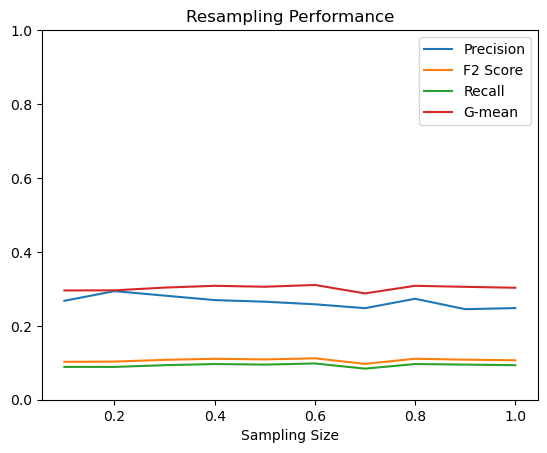

In [76]:
get_performance_visualisation("SMOTE", X_train, X_val, y_train, y_val, XGBClassifier(random_state=19))

Sampling Size: 0.1

Confusion Matrix: 
 [[9625  605]
 [ 503  139]]
TN: 9625, FP: 605, FN: 503, TP: 139


Precision:  0.1868279569892473
Recall:  0.21651090342679127
F2:  0.2098429951690821
G-Mean:  0.45133855935385736

Sampling Size: 0.2

Confusion Matrix: 
 [[9326  904]
 [ 443  199]]
TN: 9326, FP: 904, FN: 443, TP: 199


Precision:  0.18041704442429737
Recall:  0.3099688473520249
F2:  0.271043312448924
G-Mean:  0.5315803427903931

Sampling Size: 0.3

Confusion Matrix: 
 [[9131 1099]
 [ 427  215]]
TN: 9131, FP: 1099, FN: 427, TP: 215


Precision:  0.16362252663622526
Recall:  0.3348909657320872
F2:  0.2769191138588356
G-Mean:  0.546730208270364

Sampling Size: 0.4

Confusion Matrix: 
 [[8872 1358]
 [ 377  265]]
TN: 8872, FP: 1358, FN: 377, TP: 265


Precision:  0.16327788046826863
Recall:  0.4127725856697819
F2:  0.31615366261035555
G-Mean:  0.5983129083280546

Sampling Size: 0.5

Confusion Matrix: 
 [[8843 1387]
 [ 367  275]]
TN: 8843, FP: 1387, FN: 367, TP: 275


Precision:  0.165463

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.186828,0.209843,0.216511,0.451339,0.1
1,0.180417,0.271043,0.309969,0.531580,0.2
2,0.163623,0.276919,0.334891,0.546730,0.3
3,0.163278,0.316154,0.412773,0.598313,0.4
4,0.165463,0.325059,0.428349,0.608500,0.5
5,0.163342,0.313998,0.408100,0.595453,0.6
6,0.164350,0.322046,0.423676,0.605309,0.7
7,0.155917,0.319467,0.433022,0.607715,0.8


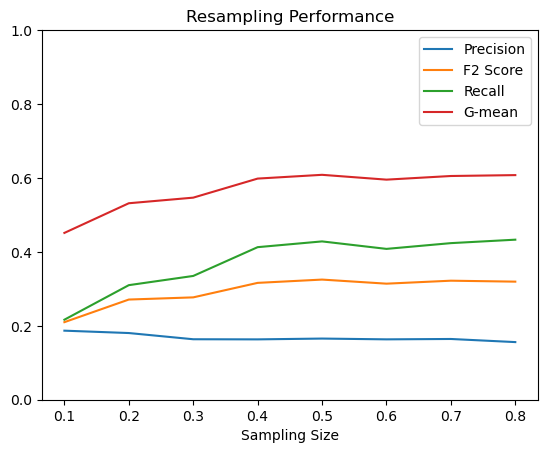

In [77]:
get_performance_visualisation("SMOTEENN", X_train, X_val, y_train, y_val, XGBClassifier(random_state=19))

Sampling Size: 1

Confusion Matrix: 
 [[10085   145]
 [  593    49]]
TN: 10085, FP: 145, FN: 593, TP: 49


Precision:  0.25257731958762886
Recall:  0.0763239875389408
F2:  0.0887038377986966
G-Mean:  0.27430306503715896

Sampling Size: 2

Confusion Matrix: 
 [[10021   209]
 [  576    66]]
TN: 10021, FP: 209, FN: 576, TP: 66


Precision:  0.24
Recall:  0.102803738317757
F2:  0.11607456911712981
G-Mean:  0.3173380640417406

Sampling Size: 3

Confusion Matrix: 
 [[9974  256]
 [ 561   81]]
TN: 9974, FP: 256, FN: 561, TP: 81


Precision:  0.2403560830860534
Recall:  0.1261682242990654
F2:  0.13941480206540446
G-Mean:  0.3507291482064898

Sampling Size: 4

Confusion Matrix: 
 [[9962  268]
 [ 562   80]]
TN: 9962, FP: 268, FN: 562, TP: 80


Precision:  0.22988505747126436
Recall:  0.12461059190031153
F2:  0.1371742112482853
G-Mean:  0.3483476870827263

Sampling Size: 5

Confusion Matrix: 
 [[9934  296]
 [ 554   88]]
TN: 9934, FP: 296, FN: 554, TP: 88


Precision:  0.22916666666666666
Recall:  

,Precision,F2 Score,Recall,G-mean,Minority Weight
0,0.252577,0.088704,0.076324,0.274303,1
1,0.240000,0.116075,0.102804,0.317338,2
2,0.240356,0.139415,0.126168,0.350729,3
3,0.229885,0.137174,0.124611,0.348348,4
4,0.229167,0.149051,0.137072,0.364836,5
5,0.225653,0.158916,0.147975,0.378496,6
6,0.216590,0.156562,0.146417,0.376233,7
7,0.236277,0.165718,0.154206,0.386500,8
8,0.226216,0.175929,0.166667,0.400879,9
9,0.218029,0.170772,0.161994,0.395079,10


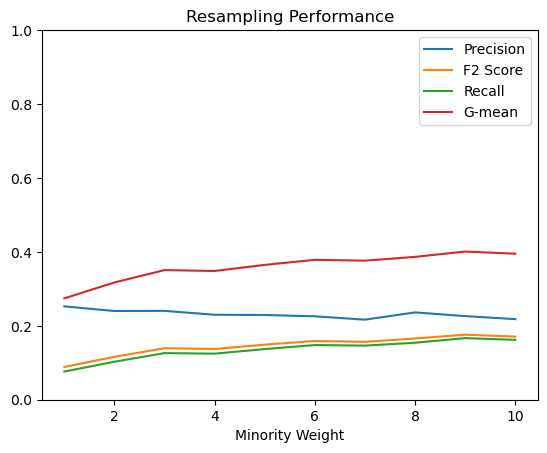

In [78]:
get_performance_weighing('scale', X_train, X_val, y_train, y_val, XGBClassifier)

### Logistic Regression

Sampling Size: 0.1

Confusion Matrix: 
 [[10192    38]
 [  632    10]]
TN: 10192, FP: 38, FN: 632, TP: 10


Precision:  0.20833333333333334
Recall:  0.01557632398753894
F2:  0.0191131498470948
G-Mean:  0.12457313000623388

Sampling Size: 0.2

Confusion Matrix: 
 [[9954  276]
 [ 581   61]]
TN: 9954, FP: 276, FN: 581, TP: 61


Precision:  0.18100890207715134
Recall:  0.09501557632398754
F2:  0.10499139414802067
G-Mean:  0.3040593794468706

Sampling Size: 0.3

Confusion Matrix: 
 [[9505  725]
 [ 507  135]]
TN: 9505, FP: 725, FN: 507, TP: 135


Precision:  0.1569767441860465
Recall:  0.2102803738317757
F2:  0.1969078179696616
G-Mean:  0.4420156171379518

Sampling Size: 0.4

Confusion Matrix: 
 [[8999 1231]
 [ 429  213]]
TN: 8999, FP: 1231, FN: 429, TP: 213


Precision:  0.14750692520775624
Recall:  0.3317757009345794
F2:  0.2654536390827517
G-Mean:  0.5402336061728681

Sampling Size: 0.5

Confusion Matrix: 
 [[8479 1751]
 [ 368  274]]
TN: 8479, FP: 1751, FN: 368, TP: 274


Precision:  0.13

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.208333,0.019113,0.015576,0.124573,0.1
1,0.181009,0.104991,0.095016,0.304059,0.2
2,0.156977,0.196908,0.210280,0.442016,0.3
3,0.147507,0.265454,0.331776,0.540234,0.4
4,0.135309,0.298280,0.426791,0.594761,0.5
5,0.133832,0.323683,0.501558,0.631968,0.6
6,0.130234,0.340698,0.571651,0.659310,0.7
7,0.127366,0.349164,0.618380,0.673767,0.8
8,0.129042,0.366223,0.677570,0.695060,0.9
9,0.127038,0.368919,0.704050,0.700206,1.0


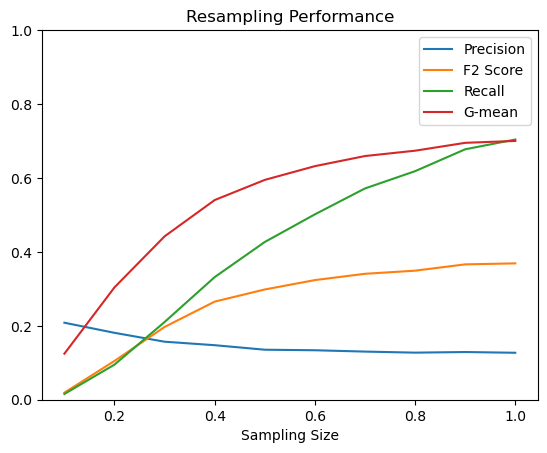

In [79]:
get_performance_visualisation("SMOTE", X_train, X_val, y_train, y_val, LogisticRegression(random_state=19))

Sampling Size: 0.1

Confusion Matrix: 
 [[9875  355]
 [ 568   74]]
TN: 9875, FP: 355, FN: 568, TP: 74


Precision:  0.17249417249417248
Recall:  0.11526479750778816
F2:  0.12345679012345678
G-Mean:  0.3335639293373556

Sampling Size: 0.2

Confusion Matrix: 
 [[8284 1946]
 [ 324  318]]
TN: 8284, FP: 1946, FN: 324, TP: 318


Precision:  0.14045936395759717
Recall:  0.4953271028037383
F2:  0.3290562913907285
G-Mean:  0.6333273951174642

Sampling Size: 0.3

Confusion Matrix: 
 [[7439 2791]
 [ 211  431]]
TN: 7439, FP: 2791, FN: 211, TP: 431


Precision:  0.13376784605834885
Recall:  0.6713395638629284
F2:  0.3721934369602764
G-Mean:  0.6986997430555397

Sampling Size: 0.4

Confusion Matrix: 
 [[6832 3398]
 [ 152  490]]
TN: 6832, FP: 3398, FN: 152, TP: 490


Precision:  0.12602880658436214
Recall:  0.7632398753894081
F2:  0.3794919454770756
G-Mean:  0.7139480930953253

Sampling Size: 0.5

Confusion Matrix: 
 [[6541 3689]
 [ 114  528]]
TN: 6541, FP: 3689, FN: 114, TP: 528


Precision:  0.1252

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.172494,0.123457,0.115265,0.333564,0.1
1,0.140459,0.329056,0.495327,0.633327,0.2
2,0.133768,0.372193,0.671340,0.698700,0.3
3,0.126029,0.379492,0.763240,0.713948,0.4
4,0.125207,0.389094,0.822430,0.725160,0.5
5,0.125450,0.397403,0.867601,0.733680,0.6
6,0.125470,0.400028,0.883178,0.736202,0.7
7,0.124380,0.400305,0.898754,0.736130,0.8


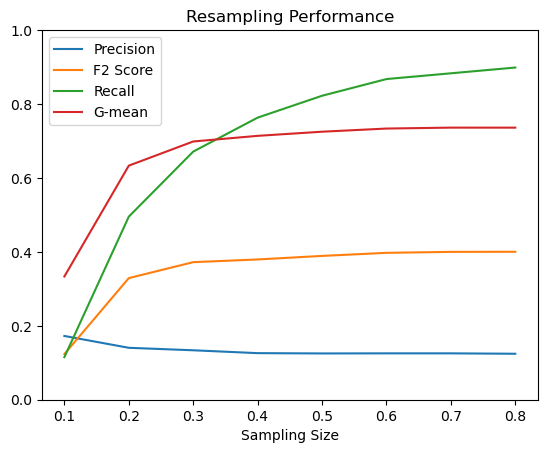

In [80]:
get_performance_visualisation("SMOTEENN", X_train, X_val, y_train, y_val, LogisticRegression(random_state=19))

Sampling Size: 1

Confusion Matrix: 
 [[10214    16]
 [  638     4]]
TN: 10214, FP: 16, FN: 638, TP: 4


Precision:  0.2
Recall:  0.006230529595015576
F2:  0.007727975270479134
G-Mean:  0.07887195240512557

Sampling Size: 2

Confusion Matrix: 
 [[10139    91]
 [  626    16]]
TN: 10139, FP: 91, FN: 626, TP: 16


Precision:  0.14953271028037382
Recall:  0.024922118380062305
F2:  0.029906542056074768
G-Mean:  0.1571636918213805

Sampling Size: 3

Confusion Matrix: 
 [[10041   189]
 [  596    46]]
TN: 10041, FP: 189, FN: 596, TP: 46


Precision:  0.19574468085106383
Recall:  0.07165109034267912
F2:  0.08205494113449875
G-Mean:  0.26519300744096863

Sampling Size: 4

Confusion Matrix: 
 [[9800  430]
 [ 562   80]]
TN: 9800, FP: 430, FN: 562, TP: 80


Precision:  0.1568627450980392
Recall:  0.12461059190031153
F2:  0.1299545159194282
G-Mean:  0.3455036982942445

Sampling Size: 5

Confusion Matrix: 
 [[9428  802]
 [ 488  154]]
TN: 9428, FP: 802, FN: 488, TP: 154


Precision:  0.161087866108786

,Precision,F2 Score,Recall,G-mean,Minority Weight
0,0.200000,0.007728,0.006231,0.078872,1
1,0.149533,0.029907,0.024922,0.157164,2
2,0.195745,0.082055,0.071651,0.265193,3
3,0.156863,0.129955,0.124611,0.345504,4
4,0.161088,0.218502,0.239875,0.470181,5
5,0.159943,0.283848,0.352025,0.557834,6
6,0.148474,0.318818,0.447040,0.612464,7
7,0.147997,0.360989,0.563863,0.670072,8
8,0.141418,0.373669,0.633956,0.693417,9
9,0.138700,0.386340,0.697819,0.712777,10


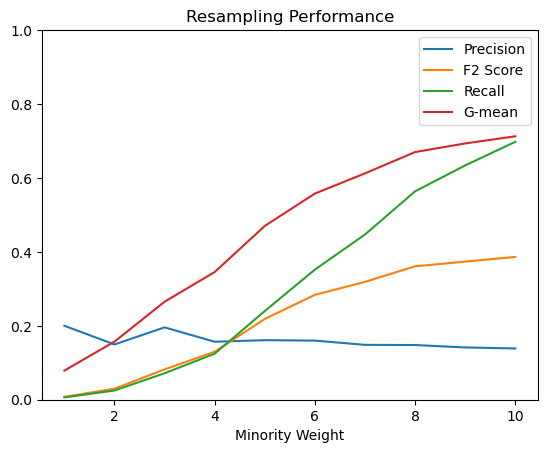

In [81]:
get_performance_weighing('dict',X_train, X_val, y_train, y_val, LogisticRegression)

In [82]:
newLR = LogisticRegression(class_weight="balanced", random_state=19)
newLR.fit(X_train, y_train)
y_pred = newLR.predict(X_val)
evaluate_results(y_val, y_pred)

Confusion Matrix: 
 [[6258 3972]
 [  65  577]]
TN: 6258, FP: 3972, FN: 65, TP: 577


Precision:  0.1268410639701033
Recall:  0.8987538940809969
F2:  0.4053674300969509
G-Mean:  0.7414815602030185


### Linear SVC

Sampling Size: 0.1

Confusion Matrix: 
 [[10226     4]
 [  637     5]]
TN: 10226, FP: 4, FN: 637, TP: 5


Precision:  0.5555555555555556
Recall:  0.00778816199376947
F2:  0.009701202949165695
G-Mean:  0.08823330872827155

Sampling Size: 0.2

Confusion Matrix: 
 [[10000   230]
 [  591    51]]
TN: 10000, FP: 230, FN: 591, TP: 51


Precision:  0.18149466192170818
Recall:  0.0794392523364486
F2:  0.08950508950508951
G-Mean:  0.27866328802045326

Sampling Size: 0.3

Confusion Matrix: 
 [[9514  716]
 [ 503  139]]
TN: 9514, FP: 716, FN: 503, TP: 139


Precision:  0.16257309941520467
Recall:  0.21651090342679127
F2:  0.2030382705229331
G-Mean:  0.4487284887524241

Sampling Size: 0.4

Confusion Matrix: 
 [[9003 1227]
 [ 428  214]]
TN: 9003, FP: 1227, FN: 428, TP: 214


Precision:  0.14850798056904926
Recall:  0.3333333333333333
F2:  0.2668994761785981
G-Mean:  0.5416206086140596

Sampling Size: 0.5

Confusion Matrix: 
 [[8505 1725]
 [ 369  273]]
TN: 8505, FP: 1725, FN: 369, TP: 273


Precision:

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.555556,0.009701,0.007788,0.088233,0.1
1,0.181495,0.089505,0.079439,0.278663,0.2
2,0.162573,0.203038,0.216511,0.448728,0.3
3,0.148508,0.266899,0.333333,0.541621,0.4
4,0.136637,0.298949,0.425234,0.594584,0.5
5,0.133838,0.321602,0.495327,0.629032,0.6
6,0.129055,0.338638,0.570093,0.657606,0.7
7,0.128567,0.356088,0.638629,0.682015,0.8
8,0.128679,0.369572,0.694704,0.699729,0.9
9,0.126958,0.372160,0.719626,0.704373,1.0


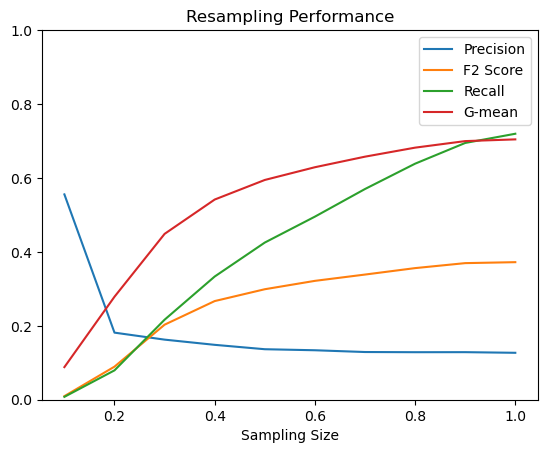

In [83]:
get_performance_visualisation("SMOTE", X_train, X_val, y_train, y_val, LinearSVC(random_state=19))

Sampling Size: 0.1

Confusion Matrix: 
 [[9951  279]
 [ 579   63]]
TN: 9951, FP: 279, FN: 579, TP: 63


Precision:  0.18421052631578946
Recall:  0.09813084112149532
F2:  0.10824742268041238
G-Mean:  0.30895719032666236

Sampling Size: 0.2

Confusion Matrix: 
 [[8317 1913]
 [ 317  325]]
TN: 8317, FP: 1913, FN: 317, TP: 325


Precision:  0.145218945487042
Recall:  0.5062305295950156
F2:  0.3381190178942988
G-Mean:  0.6415340329318081

Sampling Size: 0.3

Confusion Matrix: 
 [[7430 2800]
 [ 202  440]]
TN: 7430, FP: 2800, FN: 202, TP: 440


Precision:  0.13580246913580246
Recall:  0.6853582554517134
F2:  0.37878787878787873
G-Mean:  0.705529884684148

Sampling Size: 0.4

Confusion Matrix: 
 [[6723 3507]
 [ 129  513]]
TN: 6723, FP: 3507, FN: 129, TP: 513


Precision:  0.12761194029850748
Recall:  0.7990654205607477
F2:  0.38934426229508196
G-Mean:  0.7246610305726982

Sampling Size: 0.5

Confusion Matrix: 
 [[6417 3813]
 [  94  548]]
TN: 6417, FP: 3813, FN: 94, TP: 548


Precision:  0.12565

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.184211,0.108247,0.098131,0.308957,0.1
1,0.145219,0.338119,0.506231,0.641534,0.2
2,0.135802,0.378788,0.685358,0.705530,0.3
3,0.127612,0.389344,0.799065,0.724661,0.4
4,0.125659,0.395439,0.853583,0.731730,0.5
5,0.124617,0.398795,0.886293,0.734851,0.6
6,0.124786,0.402624,0.908100,0.738327,0.7
7,0.124895,0.405516,0.925234,0.740817,0.8


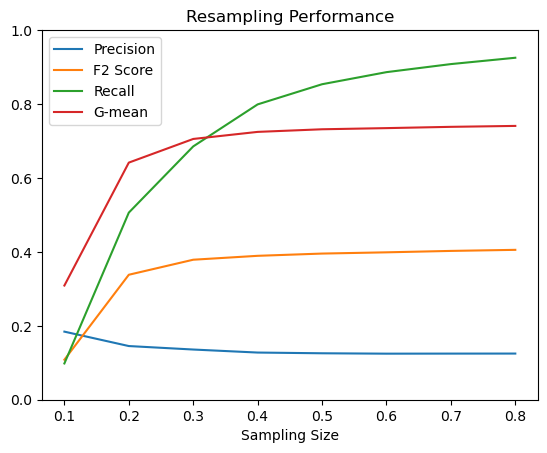

In [84]:
get_performance_visualisation("SMOTEENN", X_train, X_val, y_train, y_val, LinearSVC(random_state=19))

Sampling Size: 1

Confusion Matrix: 
 [[10229     1]
 [  641     1]]
TN: 10229, FP: 1, FN: 641, TP: 1


Precision:  0.5
Recall:  0.001557632398753894
F2:  0.0019455252918287938
G-Mean:  0.03946492287490683

Sampling Size: 2

Confusion Matrix: 
 [[10200    30]
 [  633     9]]
TN: 10200, FP: 30, FN: 633, TP: 9


Precision:  0.23076923076923078
Recall:  0.014018691588785047
F2:  0.017261219792865365
G-Mean:  0.1182268203762015

Sampling Size: 3

Confusion Matrix: 
 [[10113   117]
 [  610    32]]
TN: 10113, FP: 117, FN: 610, TP: 32


Precision:  0.21476510067114093
Recall:  0.04984423676012461
F2:  0.05888847994111152
G-Mean:  0.22197786085374

Sampling Size: 4

Confusion Matrix: 
 [[9955  275]
 [ 577   65]]
TN: 9955, FP: 275, FN: 577, TP: 65


Precision:  0.19117647058823528
Recall:  0.10124610591900311
F2:  0.11176066024759285
G-Mean:  0.3138860245456166

Sampling Size: 5

Confusion Matrix: 
 [[9500  730]
 [ 493  149]]
TN: 9500, FP: 730, FN: 493, TP: 149


Precision:  0.1695108077360637


,Precision,F2 Score,Recall,G-mean,Minority Weight
0,0.500000,0.001946,0.001558,0.039465,1
1,0.230769,0.017261,0.014019,0.118227,2
2,0.214765,0.058888,0.049844,0.221978,3
3,0.191176,0.111761,0.101246,0.313886,4
4,0.169511,0.216130,0.232087,0.464248,5
5,0.163303,0.243302,0.277259,0.502535,6
6,0.154905,0.313152,0.420561,0.600004,7
7,0.149025,0.339898,0.500000,0.640633,8
8,0.148850,0.344828,0.514019,0.647460,9
9,0.147742,0.354466,0.545171,0.661495,10


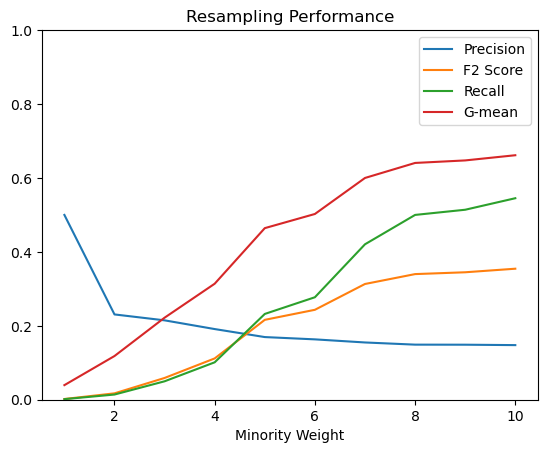

In [85]:
get_performance_weighing('dict',X_train, X_val, y_train, y_val, LinearSVC)

In [86]:
newSVC = LinearSVC(class_weight="balanced", random_state=19)
newSVC.fit(X_train, y_train)
y_pred = newSVC.predict(X_val)
evaluate_results(y_val, y_pred)

Confusion Matrix: 
 [[6257 3973]
 [  63  579]]
TN: 6257, FP: 3973, FN: 63, TP: 579


Precision:  0.1271968365553603
Recall:  0.9018691588785047
F2:  0.40660112359550565
G-Mean:  0.7427061642682871


## Random Forest

Sampling Size: 0.1

Confusion Matrix: 
 [[10221     9]
 [  638     4]]
TN: 10221, FP: 9, FN: 638, TP: 4


Precision:  0.3076923076923077
Recall:  0.006230529595015576
F2:  0.0077489345215032935
G-Mean:  0.07889897458573074

Sampling Size: 0.2

Confusion Matrix: 
 [[10215    15]
 [  629    13]]
TN: 10215, FP: 15, FN: 629, TP: 13


Precision:  0.4642857142857143
Recall:  0.020249221183800622
F2:  0.025038520801232665
G-Mean:  0.14219539459366615

Sampling Size: 0.3

Confusion Matrix: 
 [[10198    32]
 [  625    17]]
TN: 10198, FP: 32, FN: 625, TP: 17


Precision:  0.3469387755102041
Recall:  0.0264797507788162
F2:  0.03247993886129156
G-Mean:  0.162471291829828

Sampling Size: 0.4

Confusion Matrix: 
 [[10198    32]
 [  627    15]]
TN: 10198, FP: 32, FN: 627, TP: 15


Precision:  0.3191489361702128
Recall:  0.02336448598130841
F2:  0.02868068833652007
G-Mean:  0.15261520432173373

Sampling Size: 0.5

Confusion Matrix: 
 [[10182    48]
 [  622    20]]
TN: 10182, FP: 48, FN: 622, TP: 20




,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.307692,0.007749,0.006231,0.078899,0.1
1,0.464286,0.025039,0.020249,0.142195,0.2
2,0.346939,0.032480,0.026480,0.162471,0.3
3,0.319149,0.028681,0.023364,0.152615,0.4
4,0.294118,0.037936,0.031153,0.176087,0.5
5,0.233766,0.034026,0.028037,0.166960,0.6
6,0.262500,0.039653,0.032710,0.180338,0.7
7,0.253333,0.035944,0.029595,0.171561,0.8
8,0.209302,0.033911,0.028037,0.166886,0.9
9,0.261364,0.043298,0.035826,0.188674,1.0


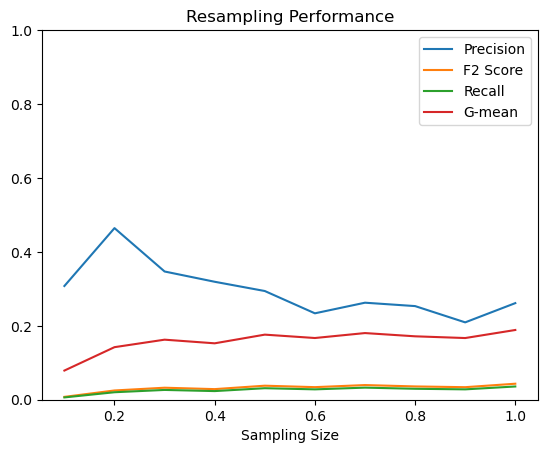

In [87]:
get_performance_visualisation("SMOTE", X_train, X_val, y_train, y_val, RandomForestClassifier(random_state=19))

Sampling Size: 0.1

Confusion Matrix: 
 [[10109   121]
 [  609    33]]
TN: 10109, FP: 121, FN: 609, TP: 33


Precision:  0.21428571428571427
Recall:  0.0514018691588785
F2:  0.06061719324026451
G-Mean:  0.22537499874941846

Sampling Size: 0.2

Confusion Matrix: 
 [[9768  462]
 [ 545   97]]
TN: 9768, FP: 462, FN: 545, TP: 97


Precision:  0.1735241502683363
Recall:  0.15109034267912771
F2:  0.1551007355292613
G-Mean:  0.37982483837745185

Sampling Size: 0.3

Confusion Matrix: 
 [[9503  727]
 [ 502  140]]
TN: 9503, FP: 727, FN: 502, TP: 140


Precision:  0.16147635524798154
Recall:  0.21806853582554517
F2:  0.20378457059679767
G-Mean:  0.450079312653239

Sampling Size: 0.4

Confusion Matrix: 
 [[9255  975]
 [ 457  185]]
TN: 9255, FP: 975, FN: 457, TP: 185


Precision:  0.15948275862068967
Recall:  0.2881619937694704
F2:  0.24812231759656656
G-Mean:  0.5105858146567382

Sampling Size: 0.5

Confusion Matrix: 
 [[9136 1094]
 [ 445  197]]
TN: 9136, FP: 1094, FN: 445, TP: 197


Precision:  0.

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.214286,0.060617,0.051402,0.225375,0.1
1,0.173524,0.155101,0.151090,0.379825,0.2
2,0.161476,0.203785,0.218069,0.450079,0.3
3,0.159483,0.248122,0.288162,0.510586,0.4
4,0.152595,0.255247,0.306854,0.523487,0.5
5,0.154908,0.260847,0.314642,0.529856,0.6
6,0.154821,0.275758,0.342679,0.549953,0.7
7,0.145981,0.275285,0.353583,0.554691,0.8


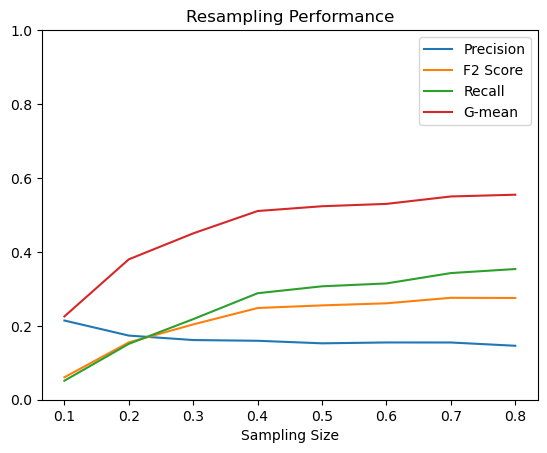

In [88]:
get_performance_visualisation("SMOTEENN", X_train, X_val, y_train, y_val, RandomForestClassifier(random_state=19))

Sampling Size: 1

Confusion Matrix: 
 [[10225     5]
 [  639     3]]
TN: 10225, FP: 5, FN: 639, TP: 3


Precision:  0.375
Recall:  0.004672897196261682
F2:  0.005822981366459626
G-Mean:  0.06834188523730113

Sampling Size: 2

Confusion Matrix: 
 [[10228     2]
 [  640     2]]
TN: 10228, FP: 2, FN: 640, TP: 2


Precision:  0.5
Recall:  0.003115264797507788
F2:  0.0038880248833592537
G-Mean:  0.055809100983456005

Sampling Size: 3

Confusion Matrix: 
 [[10227     3]
 [  639     3]]
TN: 10227, FP: 3, FN: 639, TP: 3


Precision:  0.5
Recall:  0.004672897196261682
F2:  0.005827505827505828
G-Mean:  0.06834856871345393

Sampling Size: 4

Confusion Matrix: 
 [[10227     3]
 [  639     3]]
TN: 10227, FP: 3, FN: 639, TP: 3


Precision:  0.5
Recall:  0.004672897196261682
F2:  0.005827505827505828
G-Mean:  0.06834856871345393

Sampling Size: 5

Confusion Matrix: 
 [[10224     6]
 [  640     2]]
TN: 10224, FP: 6, FN: 640, TP: 2


Precision:  0.25
Recall:  0.003115264797507788
F2:  0.00388198757763

,Precision,F2 Score,Recall,G-mean,Minority Weight
0,0.375000,0.005823,0.004673,0.068342,1
1,0.500000,0.003888,0.003115,0.055809,2
2,0.500000,0.005828,0.004673,0.068349,3
3,0.500000,0.005828,0.004673,0.068349,4
4,0.250000,0.003882,0.003115,0.055798,5
5,0.666667,0.003890,0.003115,0.055812,6
6,0.750000,0.005832,0.004673,0.068355,7
7,0.500000,0.007764,0.006231,0.078918,8
8,0.500000,0.003888,0.003115,0.055809,9
9,0.400000,0.003887,0.003115,0.055806,10


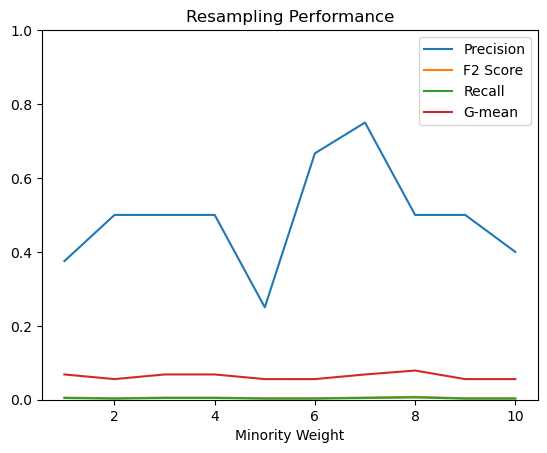

In [89]:
get_performance_weighing('dict',X_train, X_val, y_train, y_val, RandomForestClassifier)

In [90]:
newrf = RandomForestClassifier(class_weight="balanced", random_state=19)
newrf.fit(X_train, y_train)
y_pred = newrf.predict(X_val)
evaluate_results(y_val, y_pred)

Confusion Matrix: 
 [[10227     3]
 [  639     3]]
TN: 10227, FP: 3, FN: 639, TP: 3


Precision:  0.5
Recall:  0.004672897196261682
F2:  0.005827505827505828
G-Mean:  0.06834856871345393


## AdaBoost Classifier

Sampling Size: 0.1

Confusion Matrix: 
 [[10121   109]
 [  624    18]]
TN: 10121, FP: 109, FN: 624, TP: 18


Precision:  0.14173228346456693
Recall:  0.028037383177570093
F2:  0.03339517625231911
G-Mean:  0.16654923188435752

Sampling Size: 0.2

Confusion Matrix: 
 [[10094   136]
 [  625    17]]
TN: 10094, FP: 136, FN: 625, TP: 17


Precision:  0.1111111111111111
Recall:  0.0264797507788162
F2:  0.031238515251745685
G-Mean:  0.16164072138998015

Sampling Size: 0.3

Confusion Matrix: 
 [[10043   187]
 [  612    30]]
TN: 10043, FP: 187, FN: 612, TP: 30


Precision:  0.1382488479262673
Recall:  0.04672897196261682
F2:  0.05385996409335727
G-Mean:  0.2141840013951153

Sampling Size: 0.4

Confusion Matrix: 
 [[10007   223]
 [  601    41]]
TN: 10007, FP: 223, FN: 601, TP: 41


Precision:  0.1553030303030303
Recall:  0.06386292834890965
F2:  0.0723870056497175
G-Mean:  0.24994160099681345

Sampling Size: 0.5

Confusion Matrix: 
 [[10015   215]
 [  609    33]]
TN: 10015, FP: 215, FN: 609, TP: 

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.141732,0.033395,0.028037,0.166549,0.1
1,0.111111,0.031239,0.026480,0.161641,0.2
2,0.138249,0.053860,0.046729,0.214184,0.3
3,0.155303,0.072387,0.063863,0.249942,0.4
4,0.133065,0.058594,0.051402,0.224325,0.5
5,0.134670,0.080562,0.073209,0.266547,0.6
6,0.165829,0.111261,0.102804,0.315385,0.7
7,0.133183,0.097974,0.091900,0.297407,0.8
8,0.142259,0.111622,0.105919,0.318864,0.9
9,0.143885,0.128041,0.124611,0.344692,1.0


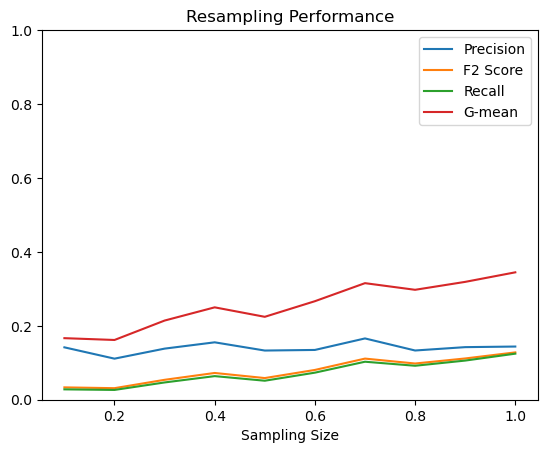

In [91]:
get_performance_visualisation("SMOTE", X_train, X_val, y_train, y_val, AdaBoostClassifier(random_state=19))

Sampling Size: 0.1

Confusion Matrix: 
 [[9789  441]
 [ 570   72]]
TN: 9789, FP: 441, FN: 570, TP: 72


Precision:  0.14035087719298245
Recall:  0.11214953271028037
F2:  0.11684518013631937
G-Mean:  0.3275895817728532

Sampling Size: 0.2

Confusion Matrix: 
 [[9170 1060]
 [ 444  198]]
TN: 9170, FP: 1060, FN: 444, TP: 198


Precision:  0.1573926868044515
Recall:  0.308411214953271
F2:  0.25875588081547307
G-Mean:  0.5257895279250153

Sampling Size: 0.3

Confusion Matrix: 
 [[8749 1481]
 [ 382  260]]
TN: 8749, FP: 1481, FN: 382, TP: 260


Precision:  0.14933946008041354
Recall:  0.40498442367601245
F2:  0.30169412856811323
G-Mean:  0.5885190853791128

Sampling Size: 0.4

Confusion Matrix: 
 [[8500 1730]
 [ 358  284]]
TN: 8500, FP: 1730, FN: 358, TP: 284


Precision:  0.141012909632572
Recall:  0.4423676012461059
F2:  0.3099083369707551
G-Mean:  0.6062661238772006

Sampling Size: 0.5

Confusion Matrix: 
 [[8234 1996]
 [ 308  334]]
TN: 8234, FP: 1996, FN: 308, TP: 334


Precision:  0.14334

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.140351,0.116845,0.112150,0.327590,0.1
1,0.157393,0.258756,0.308411,0.525790,0.2
2,0.149339,0.301694,0.404984,0.588519,0.3
3,0.141013,0.309908,0.442368,0.606266,0.4
4,0.143348,0.340955,0.520249,0.647103,0.5
5,0.135351,0.325450,0.501558,0.633014,0.6
6,0.137315,0.347316,0.562305,0.661545,0.7
7,0.138817,0.357210,0.588785,0.673661,0.8


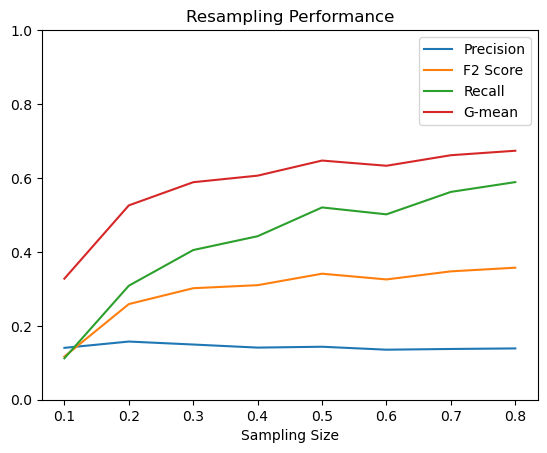

In [92]:
get_performance_visualisation("SMOTEENN", X_train, X_val, y_train, y_val, AdaBoostClassifier(random_state=19))

##  Using Class Weighing on Voting Classifier

In [93]:
vc_class = VotingClassifier(
    estimators=[('LinearSVC',LinearSVC(random_state=19)),
                ('XGB',XGBClassifier(random_state=19)),
                ('LR',LogisticRegression(random_state=19))],
    voting='hard'
)

In [94]:
train_data_with_SMOTEENN_val(X_train, X_val, y_train, y_val,5,0.8, vc_class)

Confusion Matrix: 
 [[6192 4038]
 [  63  579]]
TN: 6192, FP: 4038, FN: 63, TP: 579


Precision:  0.1254061078622482
Recall:  0.9018691588785047
F2:  0.4029227557411273
G-Mean:  0.7388383415827424


(0.1254061078622482,
 0.9018691588785047,
 0.4029227557411273,
 0.7388383415827424)

In [95]:
vc_class_2 = VotingClassifier(
    estimators=[('LinearSVC',LinearSVC(random_state=19)),
                ('XGB',XGBClassifier(random_state=19)),
                ('LR',LogisticRegression(random_state=19)),
               ('RF',RandomForestClassifier(random_state=19)),
               ('Ada',AdaBoostClassifier(random_state=19))],
    voting='hard'
)

In [96]:
train_data_with_SMOTEENN_val(X_train, X_val, y_train, y_val,5,0.8, vc_class_2)

Confusion Matrix: 
 [[7546 2684]
 [ 206  436]]
TN: 7546, FP: 2684, FN: 206, TP: 436


Precision:  0.13974358974358975
Recall:  0.6791277258566978
F2:  0.38326300984528827
G-Mean:  0.707776785736597


(0.13974358974358975,
 0.6791277258566978,
 0.38326300984528827,
 0.707776785736597)

In [97]:
vc_class_3 = VotingClassifier(
    estimators=[('XGB',XGBClassifier(random_state=19)),
               ('RF',RandomForestClassifier(random_state=19)),
               ('Ada',AdaBoostClassifier(random_state=19))],
    voting='hard'
)

In [98]:
train_data_with_SMOTEENN_val(X_train, X_val, y_train, y_val,5,0.8, vc_class_3)

Confusion Matrix: 
 [[8692 1538]
 [ 367  275]]
TN: 8692, FP: 1538, FN: 367, TP: 275


Precision:  0.1516822945394374
Recall:  0.42834890965732086
F2:  0.3138552841816937
G-Mean:  0.6032827046860834


(0.1516822945394374,
 0.42834890965732086,
 0.3138552841816937,
 0.6032827046860834)

# Hyper parameter tuning for XGB

In [99]:
# hyperopt - used for Bayesian hyperparameter tuning
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from hyperopt.pyll import scope

# for timing
from time import time
from tqdm import tqdm

import os
import pickle

In [100]:
def evaluate_F2(X_train, X_val, y_train, y_val, classifier, sampling):

    ennObj = EditedNearestNeighbours(n_neighbors=5)
    smote_only = SMOTE(random_state=19, sampling_strategy=sampling)
    smote_enn = SMOTEENN(smote=smote_only , enn= ennObj)
    X_res_smoteENN, y_res_smoteENN = smote_enn.fit_resample(X_train, y_train)

    clf = classifier
    clf.fit(X_res_smoteENN, y_res_smoteENN)

    # predict on validation set
    y_preds = clf.predict(X_val)

    # Evaluate results
    F2 = fbeta_score(y_val, y_preds, beta=2)
    return F2

In [101]:
def hyperopt(param_space, num_eval, classifier, use_scaling = False):
    start = time()
    def objective_function(params):
        clf = classifier(**params)

        if use_scaling: clf = scale_classifier(clf)
        score = evaluate_F2(X_train, X_val, y_train, y_val, clf, 0.8)

        return {'loss': -score, 'status': STATUS_OK}
    trials = Trials()
    best_param = fmin(objective_function, param_space, algo=tpe.suggest, max_evals=num_eval,
                      trials=trials)
    loss = [x['result']['loss'] for x in trials.trials]
    best_param_values = best_param
    #print(loss)
    return trials, best_param_values

In [102]:
# XGB Bayesian hyperopt

num_eval = 100

XGB_param_hyperopt = {
    'booster': hp.choice('booster', ['dart','gbtree']),
    'learning_rate': hp.uniform('learning_rate', 0.05, 0.5),
    'max_depth': scope.int(hp.quniform('max_depth', 1, 20, 1)),
    'subsample': hp.uniform('subsample', 0.1, 0.5),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.2, 0.7),
    'colsample_bynode': hp.uniform('colsample_bynode', 0.1, 0.8),
    'colsample_bylevel': hp.uniform('colsample_bylevel', 0.1, 0.4),
    'gamma': hp.uniform('gamma', 1, 20),
    'min_child_weight': hp.uniform('min_child_weight', 1.5, 2.5),
    'n_estimators': scope.int(hp.quniform('n_estimators', 50, 550, 20)),
    'reg_lambda': hp.uniform('reg_lambda', 1, 6),
    'reg_alpha':hp.uniform('reg_alpha', 0.02, 0.1),
    'scale_pos_weight':hp.uniform('scale_pos_weight', 1, 10)
}

if not os.path.exists('TuningFS'): os.mkdir('TuningFS')

def save_file(path, data):
    output = open(path, 'wb')
    pickle.dump(data, output)
    output.close()

def load_file(path):
    pkl_file = open(path, 'rb')
    data = pickle.load(pkl_file)
    pkl_file.close()
    return data

In [103]:
load = True #put load = True if you don't want to load the whole thing again
if(load == False):
    XGB_hyperopt = hyperopt(XGB_param_hyperopt,  num_eval, XGBClassifier)
    save_file('TuningFS/XGB_hyperopt_20.pkl', XGB_hyperopt)
else:
    try:
        XGB_hyperopt = load_file('TuningFS/XGB_hyperopt_20.pkl')
    except Exception as e:
        print(e)

In [104]:
XGB_hyperopt[1]

{'booster': 0,
 'colsample_bylevel': 0.3580395579010706,
 'colsample_bynode': 0.33559328670279803,
 'colsample_bytree': 0.3308705328813592,
 'gamma': 19.883492248282607,
 'learning_rate': 0.31615245441383294,
 'max_depth': 14.0,
 'min_child_weight': 1.8243629827232584,
 'n_estimators': 140.0,
 'reg_alpha': 0.020271655101767056,
 'reg_lambda': 4.410113907513246,
 'scale_pos_weight': 3.4877139611418153,
 'subsample': 0.1270191246491133}

In [105]:
trials = XGB_hyperopt[0].trials
import json

record = []
losses = []
for trial in trials:
    loss = trial["result"]["loss"]
    values = trial["misc"]['vals']

    losses.append(loss)
    record.append(values)

bayesTrialsData = pd.DataFrame(record)

bayesTrialsData.insert(0, 'loss', losses)

In [106]:
bayesTrialsData.sort_values(by='loss')

,loss,booster,colsample_bylevel,colsample_bynode,colsample_bytree,gamma,learning_rate,max_depth,min_child_weight,n_estimators,reg_alpha,reg_lambda,scale_pos_weight,subsample
89,-0.402636,[0],[0.3580395579010706],[0.33559328670279803],[0.3308705328813592],[19.883492248282607],[0.31615245441383294],[14.0],[1.8243629827232584],[140.0],[0.020271655101767056],[4.410113907513246],[3.4877139611418153],[0.1270191246491133]
23,-0.402314,[1],[0.3320651983088798],[0.3946038007074207],[0.4847072260034408],[8.163748663892962],[0.0687095642859218],[18.0],[2.383983310837832],[160.0],[0.03212939693415318],[3.207017556816446],[4.625555121227806],[0.33383790073987984]
72,-0.400706,[1],[0.24374934173840912],[0.23543484538766607],[0.37261949609970496],[8.53627553156252],[0.11113893938345251],[13.0],[1.9285055301485148],[300.0],[0.023110876937657877],[5.797652777282903],[4.928882535839854],[0.4351249396630969]
37,-0.400328,[1],[0.38025015306023785],[0.356409081931592],[0.6983023333102769],[10.316237786746823],[0.17254252968500383],[12.0],[1.7654507795606593],[200.0],[0.02030537633219649],[2.0244212702022044],[6.124442546446137],[0.3472424237459716]
76,-0.399890,[1],[0.1821113584352077],[0.19219889521790245],[0.36990746471121005],[10.463470550684251],[0.1424430165394863],[12.0],[1.698310905798032],[260.0],[0.028960667524495422],[2.0888517384411394],[4.653765343428454],[0.3146524922151364]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,-0.345816,[1],[0.1847389856010649],[0.3215106480131774],[0.5261145133824139],[17.74300350185274],[0.12072543668626641],[10.0],[2.3622702278033345],[60.0],[0.05035376488238727],[1.3557039227616121],[5.358689153965979],[0.2415213598193299]
17,-0.328110,[1],[0.14738038193543013],[0.1739740510117813],[0.6949545233206692],[2.4105101368389414],[0.07539569115575893],[5.0],[1.7816242293357083],[80.0],[0.07569860285153485],[2.4811091216368983],[5.650231338483159],[0.18110980813700764]
1,-0.324813,[0],[0.300338649258661],[0.6369875484001118],[0.34198393483522305],[2.4588249711762544],[0.07981432211442611],[15.0],[1.8366168545084596],[60.0],[0.0914338289841714],[4.8755686716422595],[6.867436683046646],[0.18051186615955653]
26,-0.323836,[1],[0.19274087880490298],[0.39720409497937437],[0.28892804212306494],[9.073835740568873],[0.05029615607109472],[18.0],[2.1158674647590123],[140.0],[0.03880336435859473],[5.464325614419618],[3.19248496005971],[0.22940095373409394]


In [107]:
xg_chosen = XGB_hyperopt[1]

xgboost_model_1   =   XGBClassifier(booster=['dart','gbtree'][xg_chosen['booster']],
                                  colsample_bytree=xg_chosen['colsample_bytree'],
                                  colsample_bynode = xg_chosen['colsample_bynode'],
                                  colsample_bylevel = xg_chosen['colsample_bylevel'],
                                  n_estimators = int(xg_chosen['n_estimators']),
                                  reg_alpha = xg_chosen['reg_alpha'],
                                  reg_lambda = xg_chosen['reg_lambda'],
                                  max_depth=int(xg_chosen['max_depth']),
                                  subsample = xg_chosen['subsample'],
                                  gamma = xg_chosen['gamma'],
                                  min_child_weight = xg_chosen['min_child_weight'],
                                  scale_pos_weight = xg_chosen['scale_pos_weight'],
                                  learning_rate=xg_chosen['learning_rate'],
                                  random_state=19)

In [108]:
xgboost_model_1

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=0.3580395579010706,
              colsample_bynode=0.33559328670279803,
              colsample_bytree=0.3308705328813592, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=19.883492248282607, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.31615245441383294, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=14, max_leaves=None,
              min_child_weight=1.8243629827232584, missing=nan,
              monotone_constraints=None, n_estimators=140, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=19, ...)

## Second Round of Tuning for XGB

In [109]:
# parameters = xg_chosen.keys()

In [110]:
# sorted_results = bayesTrialsData.sort_values('loss')
# sorted_results

In [111]:
# sorted_results.reset_index(inplace=True)

In [112]:
# sorted_results

In [113]:
# sorted_results.drop('index',axis=1,inplace=True)

In [114]:
# top_10 = sorted_results.iloc[0:10]
# top_10

In [115]:
# for i in parameters:
#     minimum = top_10[i].min()
#     maximum = top_10[i].max()
#     print(i,'Min:',minimum,'Max:',maximum)

In [116]:
# # XGB Bayesian hyperopt2

# num_eval_2 = 100


# XGB_param_hyperopt2 = {
#     'booster': hp.choice('booster', ['gbtree']),
#     'learning_rate': hp.uniform('learning_rate', top_10['learning_rate'].min()[0], top_10['learning_rate'].max()[0]),
#     'max_depth': scope.int(hp.quniform('max_depth', top_10['max_depth'].min()[0], top_10['max_depth'].max()[0], 1)),
#     'subsample': hp.uniform('subsample', top_10['subsample'].min()[0], top_10['subsample'].max()[0]),
#     'colsample_bytree': hp.uniform('colsample_bytree', top_10['colsample_bytree'].min()[0], top_10['colsample_bytree'].max()[0]),
#     'colsample_bynode': hp.uniform('colsample_bynode', top_10['colsample_bynode'].min()[0], top_10['colsample_bynode'].max()[0]),
#     'colsample_bylevel': hp.uniform('colsample_bylevel', top_10['colsample_bylevel'].min()[0], top_10['colsample_bylevel'].max()[0]),
#     'gamma': hp.uniform('gamma', top_10['gamma'].min()[0], top_10['gamma'].max()[0]),
#     'min_child_weight': hp.uniform('min_child_weight', top_10['min_child_weight'].min()[0], top_10['min_child_weight'].max()[0]),
#     'n_estimators': scope.int(hp.quniform('n_estimators', top_10['n_estimators'].min()[0], top_10['n_estimators'].max()[0], 20)),
#     'reg_lambda': hp.uniform('reg_lambda', top_10['reg_lambda'].min()[0], top_10['reg_lambda'].max()[0]),
#     'reg_alpha':hp.uniform('reg_alpha', top_10['reg_alpha'].min()[0], top_10['reg_alpha'].max()[0]),
#     'scale_pos_weight':hp.uniform('scale_pos_weight', top_10['scale_pos_weight'].min()[0], top_10['scale_pos_weight'].max()[0])
# }

# if not os.path.exists('TuningFS'): os.mkdir('TuningFS')

# def save_file(path, data):
#     output = open(path, 'wb')
#     pickle.dump(data, output)
#     output.close()

# def load_file(path):
#     pkl_file = open(path, 'rb')
#     data = pickle.load(pkl_file)
#     pkl_file.close()
#     return data

In [117]:
# load = False
# if(load == False):
#     XGB_hyperopt2 = hyperopt(XGB_param_hyperopt2,  num_eval_2, XGBClassifier)
#     save_file('TuningFS/XGB_hyperopt2.pkl', XGB_hyperopt2)
# else:
#     try:
#         XGB_hyperopt2 = load_file('TuningFS/XGB_hyperopt2.pkl')
#     except Exception as e:
#         print(e)

In [118]:
# xg_chosen2 = XGB_hyperopt2[1]
# xg_chosen2

In [119]:
# trials = XGB_hyperopt2[0].trials
# import json

# record = []
# losses = []
# for trial in trials:
#     loss = trial["result"]["loss"]
#     values = trial["misc"]['vals']
#     #print(loss,values)
#     losses.append(loss)
#     record.append(values)

# bayesTrialsData2 = pd.DataFrame(record)

# #if you have time try to make this part of the code more "pandas-like" - I just did an iteration for this
# # I left the values as list.

# bayesTrialsData2.insert(0, 'loss', losses)

In [120]:
# bayesTrialsData2.sort_values(by='loss')

In [121]:
# xg_chosen2 = XGB_hyperopt2[1]

# xgboost_model_2   =   XGBClassifier(booster=['gbtree'][xg_chosen2['booster']],
#                                   colsample_bytree=xg_chosen2['colsample_bytree'],
#                                   colsample_bynode = xg_chosen2['colsample_bynode'],
#                                   colsample_bylevel = xg_chosen2['colsample_bylevel'],
#                                   n_estimators = int(xg_chosen2['n_estimators']),
#                                   reg_alpha = xg_chosen2['reg_alpha'],
#                                   reg_lambda = xg_chosen2['reg_lambda'],
#                                   max_depth=int(xg_chosen2['max_depth']),
#                                   subsample = xg_chosen2['subsample'],
#                                   gamma = xg_chosen2['gamma'],
#                                   min_child_weight = xg_chosen2['min_child_weight'],
#                                   scale_pos_weight = xg_chosen2['scale_pos_weight'],
#                                   learning_rate=xg_chosen2['learning_rate'],
#                                   random_state=19)

In [122]:
# xgboost_model_2.get_xgb_params()

In [123]:
# xgboost_model_2

### Model without tuning

In [124]:
train_model(X_train, X_test, y_train, y_test, XGBClassifier(random_state=19))

Confusion Matrix: 
 [[1408   13]
 [  84    5]]
TN: 1408, FP: 13, FN: 84, TP: 5


Precision:  0.2777777777777778
Recall:  0.056179775280898875
F2:  0.06684491978609626
G-Mean:  0.23593604077831368


### Model without tuning but with imbalance handling

In [125]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test, 5, 0.8, XGBClassifier(random_state=19))

Confusion Matrix: 
 [[1235  186]
 [  48   41]]
TN: 1235, FP: 186, FN: 48, TP: 41


Precision:  0.18061674008810572
Recall:  0.4606741573033708
F2:  0.3516295025728988
G-Mean:  0.632751764441955


(0.18061674008810572,
 0.4606741573033708,
 0.3516295025728988,
 0.632751764441955)

### 1st Round Tuning

In [126]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test, 5, 0.8, xgboost_model_1)

Confusion Matrix: 
 [[677 744]
 [  6  83]]
TN: 677, FP: 744, FN: 6, TP: 83


Precision:  0.1003627569528416
Recall:  0.9325842696629213
F2:  0.3508030431107354
G-Mean:  0.6665632077272985


(0.1003627569528416,
 0.9325842696629213,
 0.3508030431107354,
 0.6665632077272985)

### 2nd Round Tuning

In [127]:
# train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test, 5, 0.8, xgboost_model_2)

### Feature Importance

In [128]:
feature_weight = xgboost_model_1.feature_importances_

In [129]:
weight_df = pd.DataFrame(feature_weight,index = x_var, columns=['weights'])

In [130]:
weight_df.sort_values('weights', ascending=False)

,weights
BasePolicy_Liability,0.290481
VehicleCategory_Sport,0.110005
Fault,0.097825
Make,0.076123
BasePolicy_All Perils,0.066985
DayOfWeek_Wednesday,0.051938
WeekOfMonthClaimed_2,0.040380
BasePolicy_Collision,0.036160
VehiclePrice,0.033327
DayOfWeek_Monday,0.032419


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

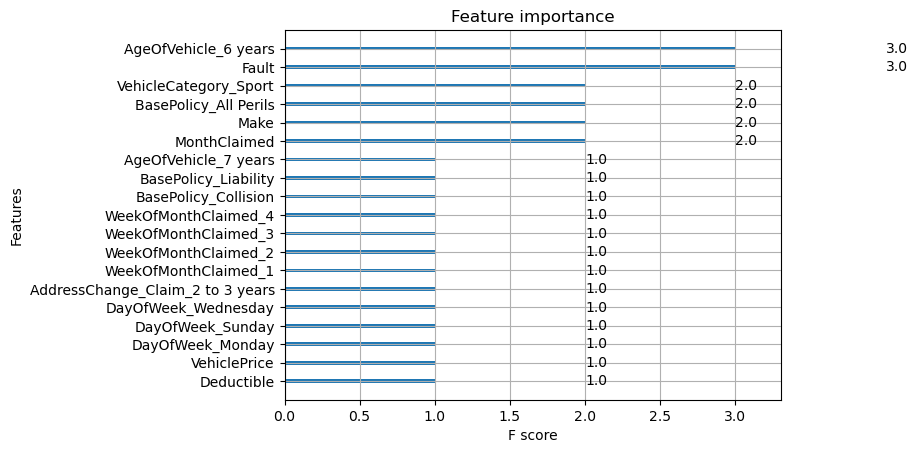

In [131]:
from xgboost import plot_importance
plot_importance(xgboost_model_1)

## Hyper Parameter Tuning for LR

In [132]:
num_eval = 100

LR_param_hyperopt = {
            'warm_start' : hp.choice('warm_start', [True, False]),
            'fit_intercept' : hp.choice('fit_intercept', [True, False]),
            'tol' : hp.uniform('tol', 0.00001, 0.0001),
            'C' : hp.uniform('C', 0.05, 3),
            'solver' : hp.choice('solver', ['lbfgs','newton-cg','liblinear','sag', 'saga']),
            'max_iter' : hp.choice('max_iter', range(100,1000)),
            'multi_class' : 'auto',
            'class_weight' : 'balanced',
}

In [133]:
load = True
if(load == False):
    LR_hyperopt1 = hyperopt(LR_param_hyperopt,  num_eval, LogisticRegression)
    save_file('TuningFS/LR_hyperopt1_20.pkl', LR_hyperopt1)
else:
    try:
        LR_hyperopt1 = load_file('TuningFS/LR_hyperopt1_20.pkl')
    except Exception as e:
        print(e)

In [134]:
LR_hyperopt1[1]

{'C': 0.2767166815322908,
 'fit_intercept': 1,
 'max_iter': 319,
 'solver': 0,
 'tol': 1.9328197879448723e-05,
 'warm_start': 1}

In [135]:
trials = LR_hyperopt1[0].trials
import json

record = []
losses = []
for trial in trials:
    loss = trial["result"]["loss"]
    values = trial["misc"]['vals']

    losses.append(loss)
    record.append(values)

bayesTrialsData = pd.DataFrame(record)

bayesTrialsData.insert(0, 'loss', losses)

In [136]:
bayesTrialsData.sort_values(by='loss')

,loss,C,fit_intercept,max_iter,solver,tol,warm_start
66,-0.402599,[0.2767166815322908],[1],[319],[0],[1.9328197879448723e-05],[1]
30,-0.402594,[0.40455895619849747],[1],[222],[0],[7.614146491081292e-05],[1]
71,-0.402594,[0.4075083612469726],[1],[359],[0],[3.238862338113041e-05],[1]
79,-0.402307,[0.3956044484215294],[1],[630],[1],[1.9552159079660437e-05],[1]
27,-0.402274,[0.36708525540801157],[1],[840],[0],[1.0014767782961126e-05],[1]
...,...,...,...,...,...,...,...
88,-0.391681,[2.721141120386343],[1],[359],[0],[6.266932552586435e-05],[1]
7,-0.391394,[2.560973678611143],[0],[68],[2],[5.7888877449975626e-05],[0]
8,-0.391176,[2.8792524648790003],[1],[321],[3],[9.965177530078974e-05],[0]
50,-0.390556,[2.9989000580079983],[1],[43],[3],[9.849811769913529e-05],[0]


In [137]:
lr_chosen = LR_hyperopt1[1]

LR_model_1   =   LogisticRegression(warm_start=[True, False][lr_chosen['warm_start']],
                                    fit_intercept=[True, False][lr_chosen['fit_intercept']],
                                    tol= lr_chosen['tol'],
                                    C=lr_chosen['C'],
                                    solver=['lbfgs','newton-cg','liblinear','sag', 'saga'][lr_chosen['solver']],
                                    max_iter=lr_chosen['max_iter'],
                                    multi_class='auto',
                                    class_weight='balanced',
                                    random_state=19)

In [138]:
LR_model_1

LogisticRegression(C=0.2767166815322908, class_weight='balanced',
                   fit_intercept=False, max_iter=319, random_state=19,
                   tol=1.9328197879448723e-05)

### Model without tuning

In [139]:
train_model(X_train, X_test, y_train, y_test, LogisticRegression(random_state=19))

Confusion Matrix: 
 [[1418    3]
 [  88    1]]
TN: 1418, FP: 3, FN: 88, TP: 1


Precision:  0.25
Recall:  0.011235955056179775
F2:  0.013888888888888888
G-Mean:  0.10588783607219825


### Model without tuning but with imbalance handling

In [140]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,LogisticRegression(random_state=19))

Confusion Matrix: 
 [[846 575]
 [  9  80]]
TN: 846, FP: 575, FN: 9, TP: 80


Precision:  0.12213740458015267
Recall:  0.898876404494382
F2:  0.39564787339268054
G-Mean:  0.7315400922343684


(0.12213740458015267,
 0.898876404494382,
 0.39564787339268054,
 0.7315400922343684)

### Model with tuning

In [141]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,LR_model_1)

Confusion Matrix: 
 [[861 560]
 [  8  81]]
TN: 861, FP: 560, FN: 8, TP: 81


Precision:  0.12636505460218408
Recall:  0.9101123595505618
F2:  0.4062186559679037
G-Mean:  0.742595037870273


(0.12636505460218408,
 0.9101123595505618,
 0.4062186559679037,
 0.742595037870273)

## Hyper Parameter Tuning for SVC

In [142]:
num_eval = 100

SVC_param_hyperopt = {
            'fit_intercept' : hp.choice('fit_intercept', [True, False]),
            'tol' : hp.uniform('tol', 0.00001, 0.0001),
            'C' : hp.uniform('C', 0.05, 3),
            'max_iter' : hp.choice('max_iter', range(100,1000)),
            'class_weight' : 'balanced',
                }

In [143]:
load = True
if(load == False):
    SVC_hyperopt1 = hyperopt(SVC_param_hyperopt,  num_eval, LinearSVC)
    save_file('TuningFS/SVC_hyperopt1_20.pkl', SVC_hyperopt1)
else:
    try:
        SVC_hyperopt1 = load_file('TuningFS/SVC_hyperopt1_20.pkl')
    except Exception as e:
        print(e)

In [144]:
SVC_hyperopt1[1]

{'C': 2.106568753126751,
 'fit_intercept': 1,
 'max_iter': 175,
 'tol': 8.524586508932197e-05}

In [145]:
trials = SVC_hyperopt1[0].trials
import json

record = []
losses = []
for trial in trials:
    loss = trial["result"]["loss"]
    values = trial["misc"]['vals']

    losses.append(loss)
    record.append(values)

bayesTrialsData = pd.DataFrame(record)

bayesTrialsData.insert(0, 'loss', losses)

In [146]:
bayesTrialsData.sort_values(by='loss')

,loss,C,fit_intercept,max_iter,tol
37,-0.406629,[2.106568753126751],[1],[175],[8.524586508932197e-05]
82,-0.406593,[1.969814581796786],[1],[181],[8.390923697826051e-05]
20,-0.406228,[2.8920486579964755],[1],[157],[6.735845439642575e-05]
63,-0.405072,[1.6959805439570426],[1],[195],[8.560330078722766e-05]
70,-0.404746,[2.3851050775774025],[1],[157],[6.31011449620997e-05]
...,...,...,...,...,...
22,-0.395021,[2.9137038578486867],[1],[317],[6.961059745867707e-05]
41,-0.390788,[2.1623530607889987],[1],[172],[8.272538990564708e-05]
25,-0.389722,[2.9697159494929464],[1],[142],[7.778495489987303e-05]
43,-0.386167,[2.372827487156176],[0],[645],[5.9452777585966386e-05]


In [147]:
SVC_chosen = SVC_hyperopt1[1]

SVC_model_1   =   LinearSVC(fit_intercept=[True, False][SVC_chosen['fit_intercept']],
                                    tol= SVC_chosen['tol'],
                                    C=SVC_chosen['C'],
                                    max_iter=SVC_chosen['max_iter'],
                                    class_weight='balanced',
                                    random_state=19)

In [148]:
SVC_model_1

LinearSVC(C=2.106568753126751, class_weight='balanced', fit_intercept=False,
          max_iter=175, random_state=19, tol=8.524586508932197e-05)

### Model Without Tuning

In [149]:
train_model(X_train, X_test, y_train, y_test, LinearSVC(random_state=19))

Confusion Matrix: 
 [[1421    0]
 [  88    1]]
TN: 1421, FP: 0, FN: 88, TP: 1


Precision:  1.0
Recall:  0.011235955056179775
F2:  0.014005602240896357
G-Mean:  0.105999788000636


### Model without tuning but with imbalance handling

In [150]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,LinearSVC(random_state=19))

Confusion Matrix: 
 [[833 588]
 [  6  83]]
TN: 833, FP: 588, FN: 6, TP: 83


Precision:  0.12369597615499255
Recall:  0.9325842696629213
F2:  0.40408958130477124
G-Mean:  0.7393830742531623


(0.12369597615499255,
 0.9325842696629213,
 0.40408958130477124,
 0.7393830742531623)

### Model With Tuning

In [151]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,SVC_model_1)

Confusion Matrix: 
 [[826 595]
 [  6  83]]
TN: 826, FP: 595, FN: 6, TP: 83


Precision:  0.1224188790560472
Recall:  0.9325842696629213
F2:  0.40135396518375244
G-Mean:  0.7362698685342568


(0.1224188790560472,
 0.9325842696629213,
 0.40135396518375244,
 0.7362698685342568)

## Random Forest Tuning

In [152]:
num_eval = 100

RF_param_hyperopt = {
    'warm_start' : hp.choice('warm_start', [True, False]),
    'criterion': hp.choice('criterion', ["gini", "entropy"]),
    'bootstrap': True,
    'max_features': hp.choice('max_features', ["sqrt", "log2", None]),
    'max_depth': scope.int(hp.quniform('max_depth', 1, 20, 1)),
    'max_samples': scope.int(hp.quniform('max_samples', 1, 20, 1)),
    'min_samples_split': scope.int(hp.quniform('min_samples_split', 2, 20, 1)),
    'min_samples_leaf': scope.int(hp.quniform('min_samples_leaf', 1, 20, 1)),
    'n_estimators': scope.int(hp.quniform('n_estimators', 50, 550, 20)),
    'class_weight':'balanced'
}

In [153]:
load = True
if(load == False):
    RF_hyperopt1 = hyperopt(RF_param_hyperopt,  num_eval, RandomForestClassifier)
    save_file('TuningFS/RF_hyperopt1_20.pkl', RF_hyperopt1)
else:
    try:
        RF_hyperopt1 = load_file('TuningFS/RF_hyperopt1_20.pkl')
    except Exception as e:
        print(e)

In [154]:
RF_hyperopt1[1]

{'criterion': 1,
 'max_depth': 13.0,
 'max_features': 2,
 'max_samples': 18.0,
 'min_samples_leaf': 1.0,
 'min_samples_split': 11.0,
 'n_estimators': 420.0,
 'warm_start': 1}

In [155]:
trials = RF_hyperopt1[0].trials
import json

record = []
losses = []
for trial in trials:
    loss = trial["result"]["loss"]
    values = trial["misc"]['vals']

    losses.append(loss)
    record.append(values)

bayesTrialsData = pd.DataFrame(record)

bayesTrialsData.insert(0, 'loss', losses)

In [156]:
bayesTrialsData.sort_values(by='loss')

,loss,criterion,max_depth,max_features,max_samples,min_samples_leaf,min_samples_split,n_estimators,warm_start
85,-0.338782,[1],[13.0],[2],[18.0],[1.0],[11.0],[420.0],[1]
87,-0.338723,[1],[13.0],[2],[20.0],[1.0],[15.0],[480.0],[1]
50,-0.330950,[1],[8.0],[2],[13.0],[1.0],[2.0],[320.0],[1]
57,-0.323160,[0],[9.0],[2],[17.0],[1.0],[12.0],[240.0],[1]
68,-0.321136,[1],[6.0],[2],[14.0],[2.0],[8.0],[280.0],[1]
...,...,...,...,...,...,...,...,...,...
99,-0.238839,[1],[13.0],[2],[17.0],[13.0],[15.0],[460.0],[1]
14,-0.000000,[1],[15.0],[2],[18.0],[12.0],[6.0],[60.0],[0]
83,-0.000000,[0],[5.0],[2],[12.0],[20.0],[9.0],[160.0],[1]
28,-0.000000,[1],[7.0],[1],[19.0],[19.0],[11.0],[180.0],[0]


In [157]:
rf_chosen = RF_hyperopt1[1]


rf_model_1   =   RandomForestClassifier(warm_start=[True, False][rf_chosen['warm_start']],
                                  criterion=["gini", "entropy"][rf_chosen['criterion']],
                                  bootstrap = True,
                                  max_features = ["sqrt", "log2", None][rf_chosen['max_features']],
                                  max_depth = int(rf_chosen['max_depth']),
                                  max_samples = int(rf_chosen['max_samples']),
                                  min_samples_split = int(rf_chosen['min_samples_split']),
                                  min_samples_leaf=int(rf_chosen['min_samples_leaf']),
                                  n_estimators = int(rf_chosen['n_estimators']),
                                  class_weight = 'balanced',
                                  random_state=19)

In [158]:
rf_model_1

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=13, max_features=None, max_samples=18,
                       min_samples_split=11, n_estimators=420, random_state=19)

### Model without tuning

In [159]:
train_model(X_train, X_test, y_train, y_test, RandomForestClassifier(random_state=19))

Confusion Matrix: 
 [[1421    0]
 [  89    0]]
TN: 1421, FP: 0, FN: 89, TP: 0


Precision:  0.0
Recall:  0.0
F2:  0.0
G-Mean:  0.0


### Model without tuning but with imbalance handling

In [160]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,RandomForestClassifier(random_state=19))

Confusion Matrix: 
 [[1249  172]
 [  58   31]]
TN: 1249, FP: 172, FN: 58, TP: 31


Precision:  0.15270935960591134
Recall:  0.34831460674157305
F2:  0.27728085867620755
G-Mean:  0.5533119168098237


(0.15270935960591134,
 0.34831460674157305,
 0.27728085867620755,
 0.5533119168098237)

### Model with tuning 

In [161]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,rf_model_1)

Confusion Matrix: 
 [[708 713]
 [ 16  73]]
TN: 708, FP: 713, FN: 16, TP: 73


Precision:  0.09287531806615776
Recall:  0.8202247191011236
F2:  0.31961471103327493
G-Mean:  0.6392724913312263


(0.09287531806615776,
 0.8202247191011236,
 0.31961471103327493,
 0.6392724913312263)

## AdaBoost

In [162]:
num_eval = 100

ADA_param_hyperopt = {
    'learning_rate': hp.uniform('learning_rate', 0.05, 0.5),
    'n_estimators': scope.int(hp.quniform('n_estimators', 50, 550, 20)),
}

In [163]:
load = True
if(load == False):
    ADA_hyperopt1 = hyperopt(ADA_param_hyperopt,  num_eval, AdaBoostClassifier)
    save_file('TuningFS/ADA_hyperopt1_20.pkl', ADA_hyperopt1)
else:
    try:
        ADA_hyperopt1 = load_file('TuningFS/ADA_hyperopt1_20.pkl')
    except Exception as e:
        print(e)

In [164]:
ADA_hyperopt1[1]

{'learning_rate': 0.12186741724318868, 'n_estimators': 60.0}

In [165]:
trials = ADA_hyperopt1[0].trials
import json

record = []
losses = []
for trial in trials:
    loss = trial["result"]["loss"]
    values = trial["misc"]['vals']

    losses.append(loss)
    record.append(values)

bayesTrialsData = pd.DataFrame(record)

bayesTrialsData.insert(0, 'loss', losses)

In [166]:
bayesTrialsData.sort_values(by='loss')

,loss,learning_rate,n_estimators
55,-0.390539,[0.12186741724318868],[60.0]
99,-0.390506,[0.06490251004964717],[120.0]
75,-0.390506,[0.0646140514222784],[120.0]
82,-0.390432,[0.0933984776641034],[80.0]
23,-0.389673,[0.05756471248672164],[120.0]
...,...,...,...
18,-0.325510,[0.282238784347678],[420.0]
0,-0.325212,[0.3779540083560922],[380.0]
16,-0.324134,[0.3987549169087938],[380.0]
47,-0.322826,[0.3958722103775797],[440.0]


In [167]:
ada_chosen = ADA_hyperopt1[1]


ada_model_1   =   AdaBoostClassifier(learning_rate=ada_chosen['learning_rate'],
                                    n_estimators = int(ada_chosen['n_estimators']),
                                    random_state=19)

In [168]:
ada_model_1

AdaBoostClassifier(learning_rate=0.12186741724318868, n_estimators=60,
                   random_state=19)

## Model without tuning 

In [169]:
train_model(X_train, X_test, y_train, y_test, AdaBoostClassifier(random_state=19))

Confusion Matrix: 
 [[1410   11]
 [  86    3]]
TN: 1410, FP: 11, FN: 86, TP: 3


Precision:  0.21428571428571427
Recall:  0.033707865168539325
F2:  0.040540540540540536
G-Mean:  0.1828850230585921


## Model without tuning but with imbalance handling

In [170]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,AdaBoostClassifier(random_state=19))

Confusion Matrix: 
 [[1097  324]
 [  40   49]]
TN: 1097, FP: 324, FN: 40, TP: 49


Precision:  0.13136729222520108
Recall:  0.550561797752809
F2:  0.336076817558299
G-Mean:  0.6519425269948691


(0.13136729222520108, 0.550561797752809, 0.336076817558299, 0.6519425269948691)

# Model with tuning 

In [171]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,ada_model_1)

Confusion Matrix: 
 [[846 575]
 [  8  81]]
TN: 846, FP: 575, FN: 8, TP: 81


Precision:  0.12347560975609756
Recall:  0.9101123595505618
F2:  0.40019762845849804
G-Mean:  0.7360980185261312


(0.12347560975609756,
 0.9101123595505618,
 0.40019762845849804,
 0.7360980185261312)

# Voting Classifier with tuned models

### Model Without Tuning

In [172]:
vc1 = VotingClassifier(
    estimators=[('LinearSVC',LinearSVC(random_state=19)),
                ('XGB',XGBClassifier(random_state=19)),
                ('LR',LogisticRegression(random_state=19)),
               ('RF',RandomForestClassifier(random_state=19)),
               ('Ada',AdaBoostClassifier(random_state=19))],
    voting='hard'
)

In [173]:
train_model(X_train, X_test, y_train, y_test, vc1)

Confusion Matrix: 
 [[1421    0]
 [  89    0]]
TN: 1421, FP: 0, FN: 89, TP: 0


Precision:  0.0
Recall:  0.0
F2:  0.0
G-Mean:  0.0


### Model without tuning but with imbalance handling

In [174]:
vc2 = VotingClassifier(
    estimators=[('LinearSVC',LinearSVC(random_state=19)),
                ('XGB',XGBClassifier(random_state=19)),
                ('LR',LogisticRegression(random_state=19)),
                ('RF',RandomForestClassifier(random_state=19)),
                ('Ada',AdaBoostClassifier(random_state=19))],
    voting='hard'
)

In [175]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,vc2)

Confusion Matrix: 
 [[1057  364]
 [  28   61]]
TN: 1057, FP: 364, FN: 28, TP: 61


Precision:  0.14352941176470588
Recall:  0.6853932584269663
F2:  0.3905249679897567
G-Mean:  0.7140199871030364


(0.14352941176470588,
 0.6853932584269663,
 0.3905249679897567,
 0.7140199871030364)

### Model with Tuning

In [176]:
vc3 = VotingClassifier(
    estimators=[('XGB',xgboost_model_1),
                ('LR',LR_model_1),
                ('LinearSVC', SVC_model_1),
                ('RF',rf_model_1),
                ('Ada',ada_model_1)],                
    voting='hard'
)

In [177]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,vc3)

Confusion Matrix: 
 [[817 604]
 [  7  82]]
TN: 817, FP: 604, FN: 7, TP: 82


Precision:  0.119533527696793
Recall:  0.9213483146067416
F2:  0.3934740882917466
G-Mean:  0.7278232288002465


(0.119533527696793, 0.9213483146067416, 0.3934740882917466, 0.7278232288002465)

In [178]:
vc3

VotingClassifier(estimators=[('XGB',
                              XGBClassifier(base_score=None, booster='dart',
                                            callbacks=None,
                                            colsample_bylevel=0.3580395579010706,
                                            colsample_bynode=0.33559328670279803,
                                            colsample_bytree=0.3308705328813592,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            gamma=19.883492248282607,
                                            gpu_id=None, grow_policy=None,
                                            im...
                                        class_weight='balanced',
                                        fit_intercept=False, max_iter=175,
                                        random_state=19,
                                        tol=8.524586508932197e-05)),
                             ('RF',
                              RandomForestClassifier(class_weight='balanced',
                                                     criterion='entropy',
                                                     max_depth=13,
                                                     max_features=None,
                                                     max_samples=18,
                                                     min_samples_split=11,
                                                     n_estimators=420,
                                                     random_state=19)),
                             ('Ada',
                              AdaBoostClassifier(learning_rate=0.12186741724318868,
                                                 n_estimators=60,
                                                 random_state=19))])

# Balanced DataSet

In [179]:
x_var = [i for i in list(final_df.columns) if i != 'FraudFound_P']
y_var = ['FraudFound_P']

In [180]:
X, X_test, y, y_test = train_test_split(final_df[x_var], final_df[y_var],
                                        test_size=0.1, random_state=19,
                                        stratify=final_df[y_var])

In [181]:
X_1 = X[y['FraudFound_P'] == 1].reset_index()
X_1 = X_1.drop('index',axis=1)
X_1

,Deductible,Age,AgentType,VehiclePrice,NumberOfSuppliments,PoliceReportFiled,PastNumberOfClaims,AccidentArea,AgeOfPolicyHolder,Days_Policy_Claim,...,AgeOfVehicle_3 years,AgeOfVehicle_4 years,AgeOfVehicle_5 years,AgeOfVehicle_6 years,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility
0,0.25,0.187500,0,0,2,0,2,1,3,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.25,0.578125,0,0,3,0,1,1,5,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.25,0.171875,0,5,0,0,1,1,3,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.25,0.578125,0,0,3,0,3,0,5,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.25,0.312500,0,5,3,0,3,1,4,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,0.25,0.875000,0,0,2,0,1,1,7,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
799,0.25,0.156250,0,0,3,0,3,1,3,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
800,0.25,0.171875,1,0,2,0,1,1,3,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
801,0.25,0.328125,0,0,0,0,1,1,4,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [182]:
X_1['FraudFound_P'] = 1
X_1

,Deductible,Age,AgentType,VehiclePrice,NumberOfSuppliments,PoliceReportFiled,PastNumberOfClaims,AccidentArea,AgeOfPolicyHolder,Days_Policy_Claim,...,AgeOfVehicle_4 years,AgeOfVehicle_5 years,AgeOfVehicle_6 years,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,FraudFound_P
0,0.25,0.187500,0,0,2,0,2,1,3,2,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,0.25,0.578125,0,0,3,0,1,1,5,2,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
2,0.25,0.171875,0,5,0,0,1,1,3,2,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,0.25,0.578125,0,0,3,0,3,0,5,2,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,0.25,0.312500,0,5,3,0,3,1,4,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,0.25,0.875000,0,0,2,0,1,1,7,2,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
799,0.25,0.156250,0,0,3,0,3,1,3,2,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
800,0.25,0.171875,1,0,2,0,1,1,3,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
801,0.25,0.328125,0,0,0,0,1,1,4,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1


In [183]:
X_0 = X[y['FraudFound_P'] != 1].reset_index()
X_0 = X_0.drop('index',axis=1)
X_0 = X_0[:803]
X_0

,Deductible,Age,AgentType,VehiclePrice,NumberOfSuppliments,PoliceReportFiled,PastNumberOfClaims,AccidentArea,AgeOfPolicyHolder,Days_Policy_Claim,...,AgeOfVehicle_3 years,AgeOfVehicle_4 years,AgeOfVehicle_5 years,AgeOfVehicle_6 years,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility
0,0.25,0.218750,0,5,3,0,0,1,3,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.25,0.156250,0,0,0,0,1,1,3,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.25,0.234375,0,4,3,0,1,1,3,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.50,0.531250,0,0,1,0,3,1,5,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.25,0.234375,0,1,3,0,1,1,3,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,0.25,0.250000,0,1,3,0,3,0,3,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
799,0.25,0.218750,0,5,3,0,1,1,3,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
800,0.25,0.328125,0,0,0,0,3,1,4,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
801,0.25,0.500000,0,1,3,0,1,0,5,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [184]:
X_0['FraudFound_P'] = 0
X_0

,Deductible,Age,AgentType,VehiclePrice,NumberOfSuppliments,PoliceReportFiled,PastNumberOfClaims,AccidentArea,AgeOfPolicyHolder,Days_Policy_Claim,...,AgeOfVehicle_4 years,AgeOfVehicle_5 years,AgeOfVehicle_6 years,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,FraudFound_P
0,0.25,0.218750,0,5,3,0,0,1,3,2,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
1,0.25,0.156250,0,0,0,0,1,1,3,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,0.25,0.234375,0,4,3,0,1,1,3,2,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
3,0.50,0.531250,0,0,1,0,3,1,5,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,0.25,0.234375,0,1,3,0,1,1,3,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,0.25,0.250000,0,1,3,0,3,0,3,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
799,0.25,0.218750,0,5,3,0,1,1,3,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
800,0.25,0.328125,0,0,0,0,3,1,4,2,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
801,0.25,0.500000,0,1,3,0,1,0,5,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0


In [185]:
balance_df = pd.concat([X_1,X_0])
balance_df

,Deductible,Age,AgentType,VehiclePrice,NumberOfSuppliments,PoliceReportFiled,PastNumberOfClaims,AccidentArea,AgeOfPolicyHolder,Days_Policy_Claim,...,AgeOfVehicle_4 years,AgeOfVehicle_5 years,AgeOfVehicle_6 years,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,FraudFound_P
0,0.25,0.187500,0,0,2,0,2,1,3,2,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,0.25,0.578125,0,0,3,0,1,1,5,2,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
2,0.25,0.171875,0,5,0,0,1,1,3,2,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,0.25,0.578125,0,0,3,0,3,0,5,2,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,0.25,0.312500,0,5,3,0,3,1,4,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,0.25,0.250000,0,1,3,0,3,0,3,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
799,0.25,0.218750,0,5,3,0,1,1,3,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
800,0.25,0.328125,0,0,0,0,3,1,4,2,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
801,0.25,0.500000,0,1,3,0,1,0,5,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0


In [186]:
y_1 = y[y['FraudFound_P'] == 1]
y_1

,FraudFound_P
1887,1
5360,1
194,1
7689,1
8496,1
...,...
11011,1
14628,1
6442,1
491,1


In [187]:
shuffled_df = balance_df.sample(frac=1, random_state=19)
shuffled_df = shuffled_df.reset_index()
shuffled_df = shuffled_df.drop('index', axis=1)
shuffled_df

,Deductible,Age,AgentType,VehiclePrice,NumberOfSuppliments,PoliceReportFiled,PastNumberOfClaims,AccidentArea,AgeOfPolicyHolder,Days_Policy_Claim,...,AgeOfVehicle_4 years,AgeOfVehicle_5 years,AgeOfVehicle_6 years,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,FraudFound_P
0,0.25,0.421875,0,0,1,0,3,1,4,2,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
1,0.25,0.468750,0,5,2,0,3,1,5,2,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
2,0.25,0.203125,0,0,1,0,0,1,3,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0.25,0.296875,0,0,3,0,0,1,3,2,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,0.25,0.187500,0,1,3,0,1,1,3,2,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,0.25,0.390625,0,0,1,0,3,1,4,2,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1602,0.25,0.375000,0,5,2,1,2,1,4,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
1603,0.25,0.156250,0,0,3,0,3,1,3,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1604,0.25,0.531250,0,0,3,0,1,1,5,2,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1


In [188]:
x_balanced = [i for i in list(shuffled_df.columns) if i != 'FraudFound_P']
y_balanced = ['FraudFound_P']

In [189]:
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.80, random_state=19, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(shuffled_df[x_balanced], shuffled_df[y_balanced], test_size=0.20, random_state=19)

In [190]:
X_train.shape

(1284, 45)

In [191]:
X_val.shape

(322, 45)

In [192]:
X_test.shape

(1510, 45)

In [193]:
y_train['FraudFound_P'].sum()

634

# Machine Learning Algo

## Logistic Regression

In [213]:
LR = LogisticRegression(random_state=19)

In [214]:
train_model(X_train, X_val, y_train, y_val, LR)

Confusion Matrix: 
 [[ 97  56]
 [ 15 154]]
TN: 97, FP: 56, FN: 15, TP: 154


Precision:  0.7333333333333333
Recall:  0.9112426035502958
F2:  0.8690744920993227
G-Mean:  0.7600762455062434


In [215]:
train_model(X_train, X_test, y_train, y_test, LR)

Confusion Matrix: 
 [[836 585]
 [  6  83]]
TN: 836, FP: 585, FN: 6, TP: 83


Precision:  0.12425149700598802
Recall:  0.9325842696629213
F2:  0.40527343749999994
G-Mean:  0.7407132997500467


## Linear SVC

In [216]:
svc = LinearSVC(random_state=19)

In [217]:
train_model(X_train, X_val, y_train, y_val, svc)

Confusion Matrix: 
 [[ 96  57]
 [ 14 155]]
TN: 96, FP: 57, FN: 14, TP: 155


Precision:  0.7311320754716981
Recall:  0.9171597633136095
F2:  0.8727477477477478
G-Mean:  0.7585992306002971


In [218]:
train_model(X_train, X_test, y_train, y_test, svc)

Confusion Matrix: 
 [[818 603]
 [  6  83]]
TN: 818, FP: 603, FN: 6, TP: 83


Precision:  0.12099125364431487
Recall:  0.9325842696629213
F2:  0.39827255278310936
G-Mean:  0.7326957218513912


## XBG Classifier

In [219]:
xgb = XGBClassifier(random_state=19)

In [220]:
train_model(X_train, X_val, y_train, y_val, xgb)

Confusion Matrix: 
 [[105  48]
 [ 40 129]]
TN: 105, FP: 48, FN: 40, TP: 129


Precision:  0.7288135593220338
Recall:  0.7633136094674556
F2:  0.7561547479484173
G-Mean:  0.7237697653010522


In [221]:
train_model(X_train, X_test, y_train, y_test, xgb)

Confusion Matrix: 
 [[947 474]
 [ 24  65]]
TN: 947, FP: 474, FN: 24, TP: 65


Precision:  0.12059369202226346
Recall:  0.7303370786516854
F2:  0.3631284916201118
G-Mean:  0.6976532561286248


## Random Forest

In [222]:
rf = RandomForestClassifier(random_state=19)

In [223]:
train_model(X_train, X_val, y_train, y_val, rf)

Confusion Matrix: 
 [[106  47]
 [ 20 149]]
TN: 106, FP: 47, FN: 20, TP: 149


Precision:  0.7602040816326531
Recall:  0.8816568047337278
F2:  0.8543577981651376
G-Mean:  0.7815504169661533


In [224]:
train_model(X_train, X_test, y_train, y_test, rf)

Confusion Matrix: 
 [[904 517]
 [ 14  75]]
TN: 904, FP: 517, FN: 14, TP: 75


Precision:  0.1266891891891892
Recall:  0.8426966292134831
F2:  0.3955696202531646
G-Mean:  0.7321883334712117


## AdaBoost

In [225]:
adb = AdaBoostClassifier(random_state=19)

In [226]:
train_model(X_train, X_val, y_train, y_val, adb)

Confusion Matrix: 
 [[100  53]
 [ 29 140]]
TN: 100, FP: 53, FN: 29, TP: 140


Precision:  0.7253886010362695
Recall:  0.8284023668639053
F2:  0.8055235903337168
G-Mean:  0.7358256963891685


In [227]:
train_model(X_train, X_test, y_train, y_test, adb)

Confusion Matrix: 
 [[886 535]
 [ 15  74]]
TN: 886, FP: 535, FN: 15, TP: 74


Precision:  0.12151067323481117
Recall:  0.8314606741573034
F2:  0.38341968911917096
G-Mean:  0.7200135649004503


## Voting Classifier

In [228]:
vc = VotingClassifier(
    estimators=[('XGB',xgb),('LR',LR), ('SVC', svc), ('RF', rf), ('Ada', adb)],
    voting='hard'
)

In [229]:
train_model(X_train, X_val, y_train, y_val, vc)

Confusion Matrix: 
 [[ 98  55]
 [ 16 153]]
TN: 98, FP: 55, FN: 16, TP: 153


Precision:  0.7355769230769231
Recall:  0.9053254437869822
F2:  0.8653846153846154
G-Mean:  0.7614996105085896


In [230]:
train_model(X_train, X_test, y_train, y_test, vc)

Confusion Matrix: 
 [[844 577]
 [  7  82]]
TN: 844, FP: 577, FN: 7, TP: 82


Precision:  0.1244309559939302
Recall:  0.9213483146067416
F2:  0.4039408866995074
G-Mean:  0.7397519305408939


In [231]:
vc = VotingClassifier(
    estimators=[('XGB',xgb), ('RF', rf), ('Ada', adb)],
    voting='hard'
)

In [232]:
train_model(X_train, X_val, y_train, y_val, vc)

Confusion Matrix: 
 [[102  51]
 [ 22 147]]
TN: 102, FP: 51, FN: 22, TP: 147


Precision:  0.7424242424242424
Recall:  0.8698224852071006
F2:  0.8409610983981693
G-Mean:  0.7614996105085896


In [233]:
train_model(X_train, X_test, y_train, y_test, vc)

Confusion Matrix: 
 [[900 521]
 [ 13  76]]
TN: 900, FP: 521, FN: 13, TP: 76


Precision:  0.1273031825795645
Recall:  0.8539325842696629
F2:  0.3987408184679958
G-Mean:  0.7354209687633066


In [234]:
# XGB Bayesian hyperopt

num_eval = 100

XGB_param_hyperopt_BL = {
    'booster': hp.choice('booster', ['dart','gbtree']),
    'learning_rate': hp.uniform('learning_rate', 0.05, 0.5),
    'max_depth': scope.int(hp.quniform('max_depth', 1, 20, 1)),
    'subsample': hp.uniform('subsample', 0.1, 0.5),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.2, 0.7),
    'colsample_bynode': hp.uniform('colsample_bynode', 0.1, 0.8),
    'colsample_bylevel': hp.uniform('colsample_bylevel', 0.1, 0.4),
    'gamma': hp.uniform('gamma', 1, 20),
    'min_child_weight': hp.uniform('min_child_weight', 1.5, 2.5),
    'n_estimators': scope.int(hp.quniform('n_estimators', 50, 550, 20)),
    'reg_lambda': hp.uniform('reg_lambda', 1, 6),
    'reg_alpha':hp.uniform('reg_alpha', 0.02, 0.1),
    'scale_pos_weight':hp.uniform('scale_pos_weight', 1, 10)
}

In [241]:
def evaluate_F2_BL(X_train, X_val, y_train, y_val, classifier):

    classifier.fit(X_train, y_train)

    # predict on validation set
    y_preds = classifier.predict(X_val)

    # Evaluate results
    F2 = fbeta_score(y_val, y_preds, beta=2)
    return F2

In [242]:
def hyperopt_BL(param_space, num_eval, classifier, use_scaling = False):
    start = time()
    def objective_function(params):
        clf = classifier(**params)

        if use_scaling: clf = scale_classifier(clf)
        score = evaluate_F2_BL(X_train, X_val, y_train, y_val, clf)

        return {'loss': -score, 'status': STATUS_OK}
    trials = Trials()
    best_param = fmin(objective_function, param_space, algo=tpe.suggest, max_evals=num_eval,
                      trials=trials)
    loss = [x['result']['loss'] for x in trials.trials]
    best_param_values = best_param
    #print(loss)
    return trials, best_param_values

In [243]:
load = False #put load = True if you don't want to load the whole thing again
if(load == False):
    XGB_hyperopt_BL = hyperopt_BL(XGB_param_hyperopt_BL,  num_eval, XGBClassifier)
    save_file('TuningFS/XGB_hyperopt_BL.pkl', XGB_hyperopt_BL)
else:
    try:
        XGB_hyperopt_BL = load_file('TuningFS/XGB_hyperopt_BL.pkl')
    except Exception as e:
        print(e)

100%|██████████| 100/100 [02:11<00:00,  1.32s/trial, best loss: -0.9121245828698553]


In [244]:
XGB_hyperopt_BL[1]

{'booster': 1,
 'colsample_bylevel': 0.23322294799511822,
 'colsample_bynode': 0.4802681390289664,
 'colsample_bytree': 0.5083041187025102,
 'gamma': 16.191757679989355,
 'learning_rate': 0.1939931781856371,
 'max_depth': 9.0,
 'min_child_weight': 2.0663221962393643,
 'n_estimators': 360.0,
 'reg_alpha': 0.021970343487753435,
 'reg_lambda': 5.034131276881355,
 'scale_pos_weight': 2.6731705696057713,
 'subsample': 0.3855643483926744}

In [245]:
trials = XGB_hyperopt_BL[0].trials
import json

record = []
losses = []
for trial in trials:
    loss = trial["result"]["loss"]
    values = trial["misc"]['vals']

    losses.append(loss)
    record.append(values)

bayesTrialsData = pd.DataFrame(record)

bayesTrialsData.insert(0, 'loss', losses)

In [246]:
bayesTrialsData.sort_values(by='loss')

,loss,booster,colsample_bylevel,colsample_bynode,colsample_bytree,gamma,learning_rate,max_depth,min_child_weight,n_estimators,reg_alpha,reg_lambda,scale_pos_weight,subsample
74,-0.912125,[1],[0.23322294799511822],[0.4802681390289664],[0.5083041187025102],[16.191757679989355],[0.1939931781856371],[9.0],[2.0663221962393643],[360.0],[0.021970343487753435],[5.034131276881355],[2.6731705696057713],[0.3855643483926744]
5,-0.911633,[1],[0.2943950397824777],[0.568593075022142],[0.6283091703437915],[9.948218070431615],[0.4499880963090875],[20.0],[1.9636492569404047],[80.0],[0.030809714576220868],[5.6572859382501255],[1.5219418956666986],[0.3369104572835673]
58,-0.910615,[1],[0.20323290763080573],[0.5753167972445827],[0.47197185881203885],[18.602552087948695],[0.21585293105510178],[8.0],[1.9434979446915404],[240.0],[0.027162038955603797],[3.8220696993654957],[1.9945653272636423],[0.47831648004187266]
93,-0.910615,[0],[0.27049359957450375],[0.6961512473217242],[0.5403740078810729],[8.404538735617194],[0.07552424372559341],[11.0],[2.178147494997161],[400.0],[0.08380545710511308],[5.677741561989806],[2.1590460374667066],[0.17549871097303954]
81,-0.910615,[1],[0.20440910250444794],[0.6983168536833705],[0.4729566440624582],[10.762187956205672],[0.18821667728100056],[8.0],[1.9413060925633518],[400.0],[0.0784071279084607],[5.848475476358331],[2.206307824230841],[0.2336804237375968]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,-0.848416,[1],[0.3313753337367533],[0.5773144030674011],[0.6992969686145414],[2.3119374301886695],[0.4626599759669565],[18.0],[1.798582501268829],[300.0],[0.046351699446570215],[5.998021274883301],[8.930086849785695],[0.3905591317955745]
90,-0.841866,[1],[0.1351517755987034],[0.6106089937110537],[0.6083000899852204],[17.06498595225128],[0.3041988790472795],[9.0],[2.120435117313705],[460.0],[0.0424477030730914],[5.291664014435316],[1.176956296223381],[0.3734648212288727]
78,-0.822857,[1],[0.16598837315747744],[0.3603471947202994],[0.44939642451415124],[17.321746837086213],[0.23115428269631236],[9.0],[2.0021989429666207],[300.0],[0.05465223882091545],[4.080685284365766],[1.0456546119742942],[0.3997860498794672]
27,-0.818078,[1],[0.31319881703334024],[0.49628405054924896],[0.5161728026478588],[18.66860289018638],[0.3922016942328777],[9.0],[2.0349471709533793],[100.0],[0.04647827849016905],[3.614000739840546],[1.0350377778852655],[0.28800234304868955]


In [247]:
xg_chosen_BL = XGB_hyperopt_BL[1]

xgboost_model_BL   =   XGBClassifier(booster=['dart','gbtree'][xg_chosen_BL['booster']],
                                  colsample_bytree=xg_chosen_BL['colsample_bytree'],
                                  colsample_bynode = xg_chosen_BL['colsample_bynode'],
                                  colsample_bylevel = xg_chosen_BL['colsample_bylevel'],
                                  n_estimators = int(xg_chosen_BL['n_estimators']),
                                  reg_alpha = xg_chosen_BL['reg_alpha'],
                                  reg_lambda = xg_chosen_BL['reg_lambda'],
                                  max_depth=int(xg_chosen_BL['max_depth']),
                                  subsample = xg_chosen_BL['subsample'],
                                  gamma = xg_chosen_BL['gamma'],
                                  min_child_weight = xg_chosen_BL['min_child_weight'],
                                  scale_pos_weight = xg_chosen_BL['scale_pos_weight'],
                                  learning_rate=xg_chosen_BL['learning_rate'],
                                  random_state=19)

In [248]:
xgboost_model_BL

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=0.23322294799511822,
              colsample_bynode=0.4802681390289664,
              colsample_bytree=0.5083041187025102, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=16.191757679989355, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1939931781856371, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=2.0663221962393643, missing=nan,
              monotone_constraints=None, n_estimators=360, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=19, ...)

In [250]:
train_model(X_train, X_test, y_train, y_test, xgboost_model_BL)

Confusion Matrix: 
 [[791 630]
 [  4  85]]
TN: 791, FP: 630, FN: 4, TP: 85


Precision:  0.11888111888111888
Recall:  0.9550561797752809
F2:  0.3968253968253968
G-Mean:  0.7291311663256634


In [252]:
train_model(X_train, X_test, y_train, y_test, XGBClassifier(random_state=19))

Confusion Matrix: 
 [[947 474]
 [ 24  65]]
TN: 947, FP: 474, FN: 24, TP: 65


Precision:  0.12059369202226346
Recall:  0.7303370786516854
F2:  0.3631284916201118
G-Mean:  0.6976532561286248
